<a href="https://colab.research.google.com/github/usam22/VTP_Ensemble/blob/main/VTPs_Ensamble_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from statistics import mean
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import matthews_corrcoef
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.manifold import TSNE
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Basic Standerization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
#ds = pd.read_csv('/content/drive/MyDrive/FV-cdHitDone-newFVcode_park_p100000_n50k_0.70.csv')







In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/vesicularnew.csv', sep=',',header=None)

def replace_text_in_dataframe(text, replacement, dataframe):
    return dataframe.applymap(lambda x: replacement if str(x) == text else x)

search_text = '#NAME?'
replacement = 0
dataset = replace_text_in_dataframe(search_text, replacement, dataset)

numeric_cols = dataset.select_dtypes(include=[np.number])

# Replace NaN values with the minimum value in each numeric column
dataset[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.min())

# Replace infinity values with the maximum value in each numeric column
for column in numeric_cols.columns:
    max_value = dataset[column].max()
    dataset[column].replace([np.inf, -np.inf], max_value, inplace=True)

# Separate features (X) and target variable (y)
X = dataset.iloc[:, :-1].values  # Assuming the last column is the target variable
y = dataset.iloc[:, -1].values


<ipython-input-5-9e8c98dc5a85>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return dataframe.applymap(lambda x: replacement if str(x) == text else x)
<ipython-input-5-9e8c98dc5a85>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].replace([np.inf, -np.inf], max_value, inplace=True)


In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

std_scale = MinMaxScaler()
X = np.nan_to_num(X.astype('float32'))
X_scaled = std_scale.fit_transform(X)

<ipython-input-7-1faa593dbc0d>:5: RuntimeWarning: overflow encountered in cast
  X = np.nan_to_num(X.astype('float32'))
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:505: RuntimeWarning: overflow encountered in subtract
  data_range = data_max - data_min
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Assuming `X` and `y` are already defined and preprocessed
y_categorical = to_categorical(y)

# Define a simple feedforward neural network
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y_categorical, epochs=50, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7589 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7578 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7621 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7627 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7645 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7665 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 8/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7583 - loss: nan - val_accuracy: 0.0512 - val_loss: nan
Epoch 9/50
489/489 ━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Evaluate model
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_classes))
print("Classification Report:")
print(classification_report(y, y_pred_classes))

# Calculate ROC and AUC
ns_probs_dl = [0 for _ in range(len(y))]
lr_probs_dl = y_pred[:, 1]

ns_fpr_dl, ns_tpr_dl, _ = roc_curve(y, ns_probs_dl)
lr_fpr_dl, lr_tpr_dl, _ = roc_curve(y, lr_probs_dl)
auc_score_dl = round(roc_auc_score(y, lr_probs_dl), 2)

print('AUC Score:', auc_score_dl)


611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[12117     0]
 [ 7414     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77     12117
           1       0.00      0.00      0.00      7414

    accuracy                           0.62     19531
   macro avg       0.31      0.50      0.38     19531
weighted avg       0.38      0.62      0.48     19531



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Input contains NaN.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(ns_fpr1, ns_tpr1, linestyle='--', label='No Skill RF')
plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

plt.plot(ns_fpr2, ns_tpr2, linestyle='--', label='No Skill LGBM')
plt.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

plt.plot(ns_fpr3, ns_tpr3, linestyle='--', label='No Skill XGB')
plt.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

plt.plot(ns_fpr4, ns_tpr4, linestyle='--', label='No Skill ET')
plt.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC :{:.2f}'.format(auc_score4))

plt.plot(ns_fpr5, ns_tpr5, linestyle='--', label='No Skill Stacking')
plt.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC :{:.2f}'.format(auc_score5))

plt.plot(ns_fpr6, ns_tpr6, linestyle='--', label='No Skill Bagging')
plt.plot(lr_fpr6, lr_tpr6, marker='.', color='orange', label='Bagging AUC :{:.2f}'.format(auc_score6))

# Add Deep Learning ROC Curve
plt.plot(ns_fpr_dl, ns_tpr_dl, linestyle='--', label='No Skill DL')
plt.plot(lr_fpr_dl, lr_tpr_dl, marker='.', color='purple', label='DL AUC :{:.2f}'.format(auc_score_dl))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


NameError: name 'ns_fpr1' is not defined

<Figure size 1000x800 with 0 Axes>

# Self-**Consistency**

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
print('Self-Consistency Random Forest')
clf = clf1.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(y))]
lr_probs=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(y, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(y, lr_probs)
auc_score = round(roc_auc_score(y, lr_probs),2)

print('Self-Consistency LGBM')
clf=clf2.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(y))]
lr_probs2=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(y, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(y, lr_probs2)
auc_score2 = round(roc_auc_score(y, lr_probs2),2)

print('Self-Consistency XGB')
clf=clf3.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(y))]
lr_probs3=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(y, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(y, lr_probs3)
auc_score3 = round(roc_auc_score(y, lr_probs3),2)


print('Self-Consistency ET')
clf=clf4.fit(X,y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(y))]
lr_probs4=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(y, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(y, lr_probs4)
auc_score4 = round(roc_auc_score(y, lr_probs4),2)

print('Self-Consistency Stacking')
clf=clf5.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs5=[0 for _ in range(len(y))]
lr_probs5=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs5=lr_probs5[:, 1]

# calculate roc curves
ns_fpr5, ns_tpr5, _=roc_curve(y, ns_probs5)
lr_fpr5, lr_tpr5, _=roc_curve(y, lr_probs5)
auc_score5 = round(roc_auc_score(y, lr_probs5),2)



print('Self-Consistency Bagging')
clf=clf6.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs6=[0 for _ in range(len(y))]
lr_probs6=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs6=lr_probs6[:, 1]

# calculate roc curves
ns_fpr6, ns_tpr6, _=roc_curve(y, ns_probs6)
lr_fpr6, lr_tpr6, _=roc_curve(y, lr_probs6)
auc_score6 = round(roc_auc_score(y, lr_probs6),2)

Self-Consistency Random Forest


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 99.99
Sensitivity/Recall: 99.99
Specificity: 100.0
MCC: 0.99989
Precision: 100.0
F1_Score: 99.99


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Self-Consistency LGBM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7414, number of negative: 12117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37340
[LightGBM] [Info] Number of data points in the train set: 19531, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379602 -> initscore=-0.491239
[LightGBM] [Info] Start training from score -0.491239


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 86.69
Sensitivity/Recall: 92.52
Specificity: 77.15
MCC: 0.71415
Precision: 86.87
F1_Score: 89.61


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Self-Consistency XGB
Accuracy: 98.89
Sensitivity/Recall: 99.17
Specificity: 98.44
MCC: 0.97651
Precision: 99.04
F1_Score: 99.1
Self-Consistency ET


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 99.99
Sensitivity/Recall: 99.99
Specificity: 100.0
MCC: 0.99989
Precision: 100.0
F1_Score: 99.99


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Self-Consistency Stacking


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 99.99
Sensitivity/Recall: 99.99
Specificity: 100.0
MCC: 0.99989
Precision: 100.0
F1_Score: 99.99


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Self-Consistency Bagging


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 99.91
Sensitivity/Recall: 99.89
Specificity: 99.95
MCC: 0.99815
Precision: 99.97
F1_Score: 99.93


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


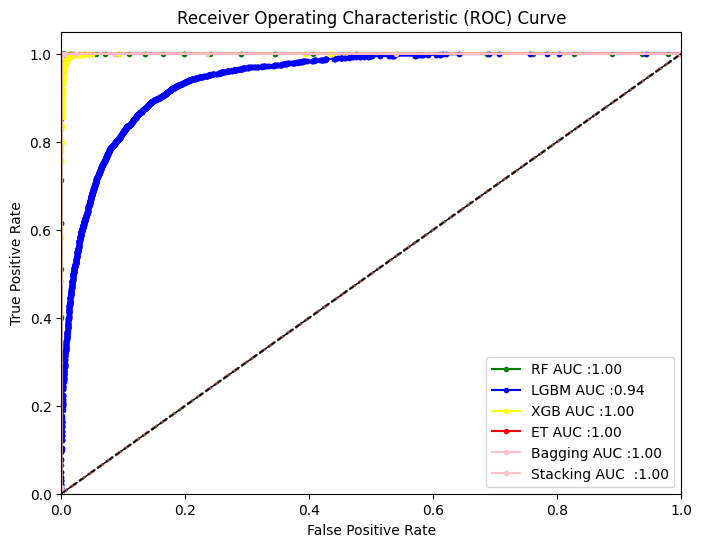

In [ ]:
import matplotlib as mpl

from matplotlib import pyplot

#pyplot.figure(figsize=(20, 10), dpi=600)
pyplot.figure(figsize=(8, 6))
# plot the roc curve for the model
pyplot.title("Self Consistency Graph")
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC :{:.2f}'.format(auc_score4))

pyplot.plot(ns_fpr6, ns_tpr6, linestyle='--')
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', color='pink', label='Bagging AUC :{:.2f}'.format(auc_score6))

pyplot.plot(ns_fpr5, ns_tpr5, linestyle='--')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC  :{:.2f}'.format(auc_score5))

# axis labels
#pyplot.xlabel('False Positive Rate')
#pyplot.ylabel('True Positive Rate')
# show the legend
#pyplot.legend(loc="lower right", fontsize=20, ncol=1)
# show the plot
#pyplot.show()


pyplot.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver Operating Characteristic (ROC) Curve')
pyplot.legend(loc='lower right')
pyplot.show()



# **Independent Test**

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()

In [ ]:
seed = np.random.seed(5)
inputSize=153

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=seed)#test_size=0.2
print('Independent Dataset Test Random Forest')
clf=clf1.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

Independent Dataset Test Random Forest


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 91.04
Sensitivity/Recall: 94.13
Specificity: 86.0
MCC: 0.80883
Precision: 91.64
F1_Score: 92.87


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
print('Independent Dataset Test LGBM')
clf=clf2.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(Y_test))]
lr_probs2=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(Y_test, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(Y_test, lr_probs2)
auc_score2 = round(roc_auc_score(Y_test, lr_probs2),2)


Independent Dataset Test LGBM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6678, number of negative: 10899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31642
[LightGBM] [Info] Number of data points in the train set: 17577, number of used features: 139
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379928 -> initscore=-0.489853
[LightGBM] [Info] Start training from score -0.489853
Accuracy: 76.87
Sensitivity/Recall: 85.47
Specificity: 62.64
MCC: 0.49705
Precision: 79.1
F1_Score: 82.16


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=seed)

print('Independent Dataset Test XGB')
clf=clf3.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(Y_test))]
lr_probs3=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(Y_test, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(Y_test, lr_probs3)
auc_score3 = round(roc_auc_score(Y_test, lr_probs3),2)



Independent Dataset Test XGB
Accuracy: 88.59
Sensitivity/Recall: 89.66
Specificity: 86.82
MCC: 0.75922
Precision: 91.84
F1_Score: 90.74


In [ ]:
print('Independent Dataset Test ET')
clf=clf4.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(Y_test))]
lr_probs4=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(Y_test, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(Y_test, lr_probs4)
auc_score4 = round(roc_auc_score(Y_test, lr_probs4),2)

Independent Dataset Test ET
Accuracy: 95.09
Sensitivity/Recall: 96.88
Specificity: 92.12
MCC: 0.89502
Precision: 95.32
F1_Score: 96.09


In [ ]:
print('Independent Dataset Test Bagging')
clf=clf6.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs6=[0 for _ in range(len(Y_test))]
lr_probs6=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs6=lr_probs6[:, 1]

# calculate roc curves
ns_fpr6, ns_tpr6, _=roc_curve(Y_test, ns_probs6)
lr_fpr6, lr_tpr6, _=roc_curve(Y_test, lr_probs6)
auc_score6 = round(roc_auc_score(Y_test, lr_probs6),2)

Independent Dataset Test Bagging
Accuracy: 89.87
Sensitivity/Recall: 90.39
Specificity: 88.99
MCC: 0.78687
Precision: 93.15
F1_Score: 91.75


In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('lgbm', clf2),('rf', clf1) ],final_estimator=lr)

In [ ]:
print('Independent Dataset Test 5-ENsemble')
clf=clf5.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs5=[0 for _ in range(len(Y_test))]
lr_probs5=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs5=lr_probs5[:, 1]

# calculate roc curves
ns_fpr5, ns_tpr5, _=roc_curve(Y_test, ns_probs5)
lr_fpr5, lr_tpr5, _=roc_curve(Y_test, lr_probs5)
auc_score5 = round(roc_auc_score(Y_test, lr_probs5),2)

Independent Dataset Test 5-ENsemble


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6678, number of negative: 10899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31642
[LightGBM] [Info] Number of data points in the train set: 17577, number of used features: 139
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379928 -> initscore=-0.489853
[LightGBM] [Info] Start training from score -0.489853


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5342, number of negative: 8719
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31266
[LightGBM] [Info] Number of data points in the train set: 14061, number of used features: 139
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379916 -> initscore=-0.489904
[LightGBM] [Info] Start training from score -0.489904


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5342, number of negative: 8719
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31363
[LightGBM] [Info] Number of data points in the train set: 14061, number of used features: 139
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379916 -> initscore=-0.489904
[LightGBM] [Info] Start training from score -0.489904


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5343, number of negative: 8719
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31321
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 136
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379960 -> initscore=-0.489717
[LightGBM] [Info] Start training from score -0.489717


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5343, number of negative: 8719
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31326
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 136
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379960 -> initscore=-0.489717
[LightGBM] [Info] Start training from score -0.489717


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5342, number of negative: 8720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31358
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 139
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379889 -> initscore=-0.490019
[LightGBM] [Info] Start training from score -0.490019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 94.27
Sensitivity/Recall: 95.24
Specificity: 92.66
MCC: 0.87808
Precision: 95.55
F1_Score: 95.39


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


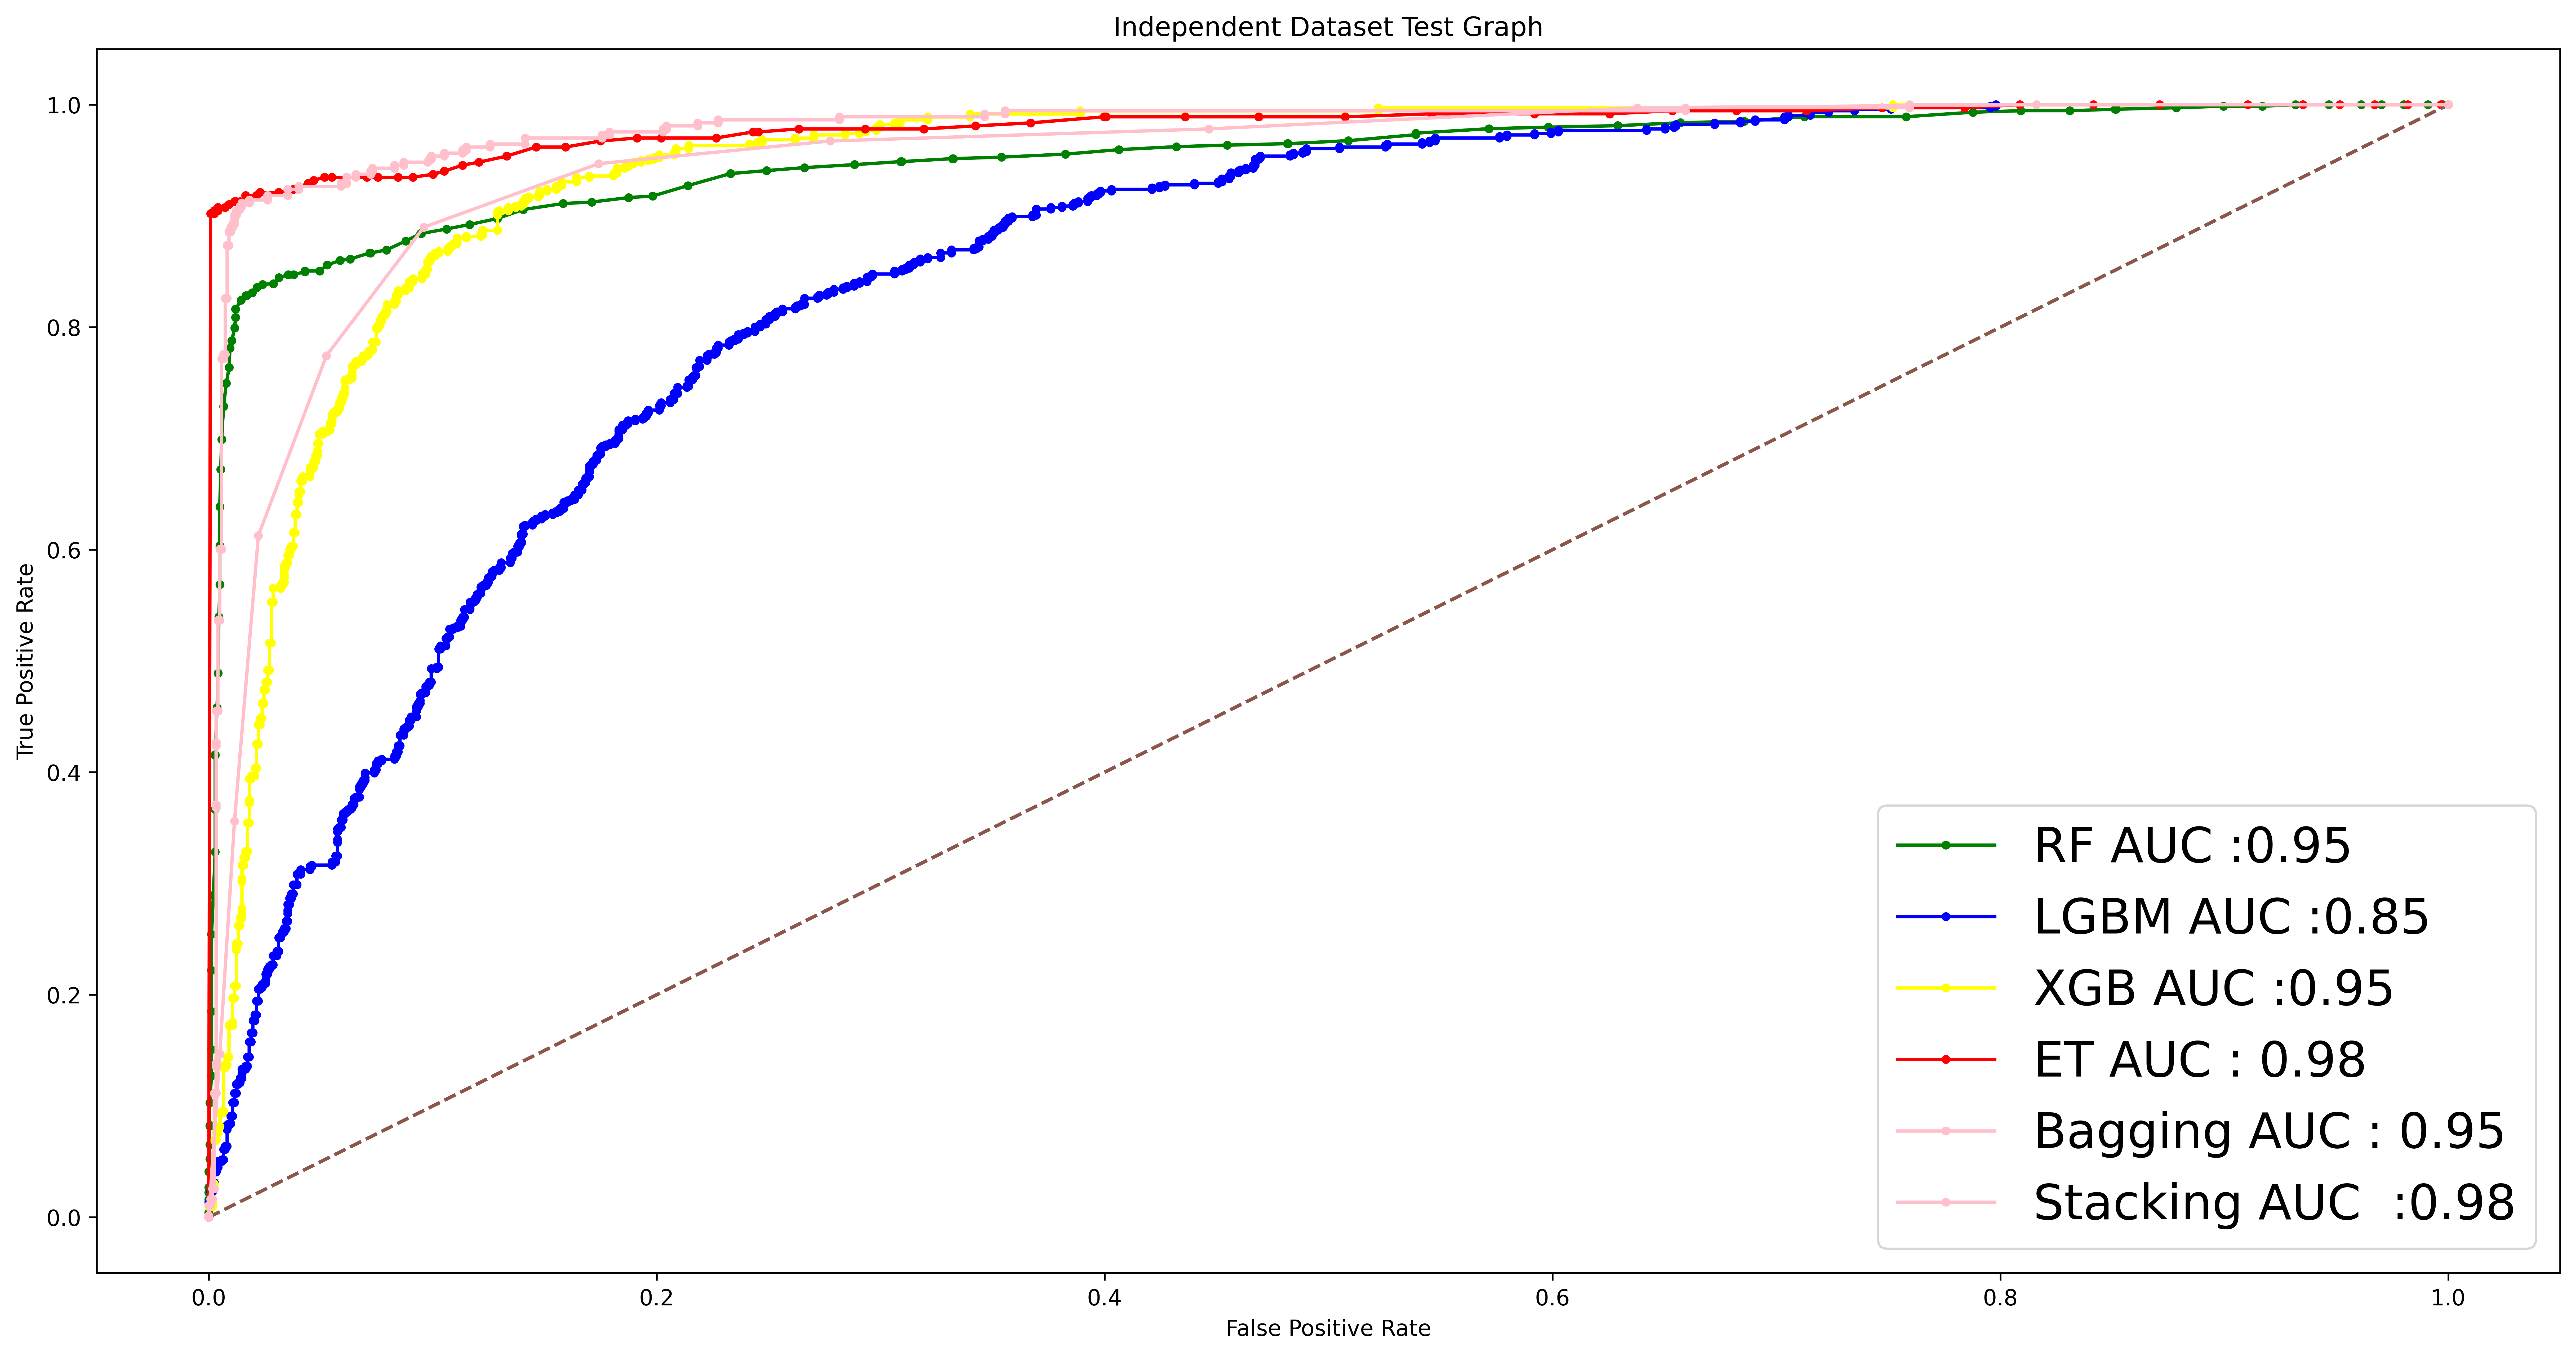

In [ ]:
# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

#pyplot.rcParams['figure.dpi'] = 200

pyplot.figure(figsize=(20, 10), dpi=600)

# plot the roc curve for the model
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label=f'RF AUC : {auc_score:.3f}')
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : {:.3f}'.format(auc_score))

pyplot.title("Independent Dataset Test Graph")
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC : '+str(auc_score4))

pyplot.plot(ns_fpr6, ns_tpr6, linestyle='--')
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', color='pink', label='Bagging AUC : '+str(auc_score6))

pyplot.plot(ns_fpr5, ns_tpr5, linestyle='--')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC  :{:.2f}'.format(auc_score5))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc="lower right", fontsize=22, ncol=1)
# show the plot
pyplot.show()

# **10 fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6 = BaggingClassifier(random_state=42)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation Random Forest
Fold : 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value en

Accuracy: 94.11
Sensitivity/Recall: 94.47
Specificity: 93.53
MCC: 0.87587
Precision: 95.98
F1_Score: 95.22
Fold : 2
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 3
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 4


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in 

Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 5
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 6
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 7


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in 

Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 8
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 9
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 10
Accuracy: 99.95
Sensitivity/Recall: 99.92
Specificity: 100.0
MCC: 0.99891
Precision: 100.0
F1_Score: 99.96


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation LGBM')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf2.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


10-fold Cross-Validation LGBM
Fold : 1
[LightGBM] [Info] Number of positive: 6672, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37255
[LightGBM] [Info] Number of data points in the train set: 17577, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379587 -> initscore=-0.491302
[LightGBM] [Info] Start training from score -0.491302


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 78.3
Sensitivity/Recall: 86.55
Specificity: 64.82
MCC: 0.53044
Precision: 80.08
F1_Score: 83.19
Fold : 2
[LightGBM] [Info] Number of positive: 6672, number of negative: 10906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37256
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379565 -> initscore=-0.491393
[LightGBM] [Info] Start training from score -0.491393


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 78.44
Sensitivity/Recall: 87.04
Specificity: 64.42
MCC: 0.53317
Precision: 79.97
F1_Score: 83.36
Fold : 3
[LightGBM] [Info] Number of positive: 6672, number of negative: 10906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37263
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379565 -> initscore=-0.491393
[LightGBM] [Info] Start training from score -0.491393


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 78.6
Sensitivity/Recall: 86.62
Specificity: 65.5
MCC: 0.53727
Precision: 80.38
F1_Score: 83.38
Fold : 4
[LightGBM] [Info] Number of positive: 6672, number of negative: 10906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37241
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379565 -> initscore=-0.491393
[LightGBM] [Info] Start training from score -0.491393


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 78.08
Sensitivity/Recall: 87.53
Specificity: 62.67
MCC: 0.52434
Precision: 79.28
F1_Score: 83.2
Fold : 5
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37155
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 79.37
Sensitivity/Recall: 87.95
Specificity: 65.32
MCC: 0.55297
Precision: 80.57
F1_Score: 84.1
Fold : 6
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37250
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 77.62
Sensitivity/Recall: 84.82
Specificity: 65.86
MCC: 0.51761
Precision: 80.25
F1_Score: 82.47
Fold : 7
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37259
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 76.86
Sensitivity/Recall: 85.81
Specificity: 62.21
MCC: 0.49786
Precision: 78.79
F1_Score: 82.15
Fold : 8
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37249
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 77.68
Sensitivity/Recall: 86.63
Specificity: 63.02
MCC: 0.51567
Precision: 79.31
F1_Score: 82.81
Fold : 9
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37208
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 78.29
Sensitivity/Recall: 85.15
Specificity: 67.07
MCC: 0.53245
Precision: 80.88
F1_Score: 82.96
Fold : 10
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37256
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152
Accuracy: 78.24
Sensitivity/Recall: 86.72
Specificity: 64.37
MCC: 0.52858
Precision: 79.92
F1_Score: 83.18


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation XGB')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf3.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation XGB
Fold : 1
Accuracy: 87.26
Sensitivity/Recall: 89.85
Specificity: 83.02
MCC: 0.72928
Precision: 89.63
F1_Score: 89.74
Fold : 2
Accuracy: 87.61
Sensitivity/Recall: 88.6
Specificity: 85.98
MCC: 0.73982
Precision: 91.16
F1_Score: 89.86
Fold : 3
Accuracy: 89.45
Sensitivity/Recall: 92.07
Specificity: 85.18
MCC: 0.7754
Precision: 91.02
F1_Score: 91.54
Fold : 4
Accuracy: 89.2
Sensitivity/Recall: 89.27
Specificity: 89.08
MCC: 0.77467
Precision: 93.03
F1_Score: 91.11
Fold : 5
Accuracy: 89.09
Sensitivity/Recall: 90.76
Specificity: 86.37
MCC: 0.76912
Precision: 91.59
F1_Score: 91.17
Fold : 6
Accuracy: 87.61
Sensitivity/Recall: 89.19
Specificity: 85.02
MCC: 0.73842
Precision: 90.69
F1_Score: 89.93
Fold : 7
Accuracy: 88.27
Sensitivity/Recall: 90.02
Specificity: 85.43
MCC: 0.75193
Precision: 90.99
F1_Score: 90.5
Fold : 8
Accuracy: 88.12
Sensitivity/Recall: 89.11
Specificity: 86.5
MCC: 0.75029
Precision: 91.53
F1_Score: 90.3
Fold : 9
Accuracy: 89.96
Sensitivity/Recall: 91.9

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation ET')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf4.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation ET
Fold : 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 94.98
Sensitivity/Recall: 98.18
Specificity: 89.76
MCC: 0.89359
Precision: 94.0
F1_Score: 96.04
Fold : 2


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 94.62
Sensitivity/Recall: 96.61
Specificity: 91.37
MCC: 0.88548
Precision: 94.81
F1_Score: 95.7
Fold : 3


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 93.86
Sensitivity/Recall: 96.53
Specificity: 89.49
MCC: 0.86903
Precision: 93.74
F1_Score: 95.11
Fold : 4


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 95.55
Sensitivity/Recall: 98.1
Specificity: 91.37
MCC: 0.90535
Precision: 94.89
F1_Score: 96.47
Fold : 5


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 95.29
Sensitivity/Recall: 97.36
Specificity: 91.9
MCC: 0.89965
Precision: 95.16
F1_Score: 96.25
Fold : 6


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 94.57
Sensitivity/Recall: 96.53
Specificity: 91.36
MCC: 0.88433
Precision: 94.81
F1_Score: 95.66
Fold : 7


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 95.24
Sensitivity/Recall: 96.78
Specificity: 92.71
MCC: 0.8986
Precision: 95.6
F1_Score: 96.19
Fold : 8


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 95.14
Sensitivity/Recall: 97.28
Specificity: 91.63
MCC: 0.89637
Precision: 95.0
F1_Score: 96.13
Fold : 9


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 94.98
Sensitivity/Recall: 97.61
Specificity: 90.69
MCC: 0.89318
Precision: 94.49
F1_Score: 96.02
Fold : 10
Accuracy: 95.19
Sensitivity/Recall: 97.11
Specificity: 92.04
MCC: 0.89746
Precision: 95.23
F1_Score: 96.16


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation STacking')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf5.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


10-fold Cross-Validation STacking
Fold : 1
[LightGBM] [Info] Number of positive: 6672, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37261
[LightGBM] [Info] Number of data points in the train set: 17577, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379587 -> initscore=-0.491302
[LightGBM] [Info] Start training from score -0.491302


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36983
[LightGBM] [Info] Number of data points in the train set: 14061, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379560 -> initscore=-0.491414
[LightGBM] [Info] Start training from score -0.491414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37010
[LightGBM] [Info] Number of data points in the train set: 14061, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379560 -> initscore=-0.491414
[LightGBM] [Info] Start training from score -0.491414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37028
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36987
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37036
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 96.01
Sensitivity/Recall: 97.03
Specificity: 94.34
MCC: 0.91515
Precision: 96.55
F1_Score: 96.79
Fold : 2
[LightGBM] [Info] Number of positive: 6672, number of negative: 10906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37195
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379565 -> initscore=-0.491393
[LightGBM] [Info] Start training from score -0.491393


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36987
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379533 -> initscore=-0.491529
[LightGBM] [Info] Start training from score -0.491529


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36966
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379533 -> initscore=-0.491529
[LightGBM] [Info] Start training from score -0.491529


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37018
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36941
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379578 -> initscore=-0.491341
[LightGBM] [Info] Start training from score -0.491341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36963
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379578 -> initscore=-0.491341
[LightGBM] [Info] Start training from score -0.491341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.85
Sensitivity/Recall: 97.61
Specificity: 92.99
MCC: 0.91173
Precision: 95.79
F1_Score: 96.69
Fold : 3
[LightGBM] [Info] Number of positive: 6672, number of negative: 10906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37255
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379565 -> initscore=-0.491393
[LightGBM] [Info] Start training from score -0.491393


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37041
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379533 -> initscore=-0.491529
[LightGBM] [Info] Start training from score -0.491529


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37006
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379533 -> initscore=-0.491529
[LightGBM] [Info] Start training from score -0.491529


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37041
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36905
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379578 -> initscore=-0.491341
[LightGBM] [Info] Start training from score -0.491341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37037
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379578 -> initscore=-0.491341
[LightGBM] [Info] Start training from score -0.491341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.95
Sensitivity/Recall: 97.94
Specificity: 92.72
MCC: 0.91395
Precision: 95.65
F1_Score: 96.78
Fold : 4
[LightGBM] [Info] Number of positive: 6672, number of negative: 10906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37264
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379565 -> initscore=-0.491393
[LightGBM] [Info] Start training from score -0.491393


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37047
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379533 -> initscore=-0.491529
[LightGBM] [Info] Start training from score -0.491529


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5337, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36994
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379533 -> initscore=-0.491529
[LightGBM] [Info] Start training from score -0.491529


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37055
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36961
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379578 -> initscore=-0.491341
[LightGBM] [Info] Start training from score -0.491341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37040
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379578 -> initscore=-0.491341
[LightGBM] [Info] Start training from score -0.491341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.39
Sensitivity/Recall: 97.27
Specificity: 92.32
MCC: 0.90189
Precision: 95.38
F1_Score: 96.32
Fold : 5
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37249
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37017
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36982
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37030
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36973
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37023
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 96.36
Sensitivity/Recall: 98.27
Specificity: 93.25
MCC: 0.92268
Precision: 95.97
F1_Score: 97.11
Fold : 6
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37235
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37007
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36979
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37019
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36958
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37022
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.14
Sensitivity/Recall: 97.11
Specificity: 91.9
MCC: 0.89636
Precision: 95.15
F1_Score: 96.12
Fold : 7
[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37249
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37018
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36999
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37035
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36950
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37031
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.6
Sensitivity/Recall: 97.69
Specificity: 92.17
MCC: 0.90624
Precision: 95.33
F1_Score: 96.5
Fold : 8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37246
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37036
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36937
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37042
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36970
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37024
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.49
Sensitivity/Recall: 98.18
Specificity: 91.09
MCC: 0.90426
Precision: 94.75
F1_Score: 96.43
Fold : 9


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37260
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37032
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37000
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37049
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36977
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37035
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.49
Sensitivity/Recall: 97.03
Specificity: 92.98
MCC: 0.90405
Precision: 95.77
F1_Score: 96.4
Fold : 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6673, number of negative: 10905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37263
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379622 -> initscore=-0.491152
[LightGBM] [Info] Start training from score -0.491152


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37040
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37003
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5338, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37043
[LightGBM] [Info] Number of data points in the train set: 14062, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379605 -> initscore=-0.491227
[LightGBM] [Info] Start training from score -0.491227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36982
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5339, number of negative: 8724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37041
[LightGBM] [Info] Number of data points in the train set: 14063, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379649 -> initscore=-0.491039
[LightGBM] [Info] Start training from score -0.491039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 95.6
Sensitivity/Recall: 97.36
Specificity: 92.71
MCC: 0.90621
Precision: 95.62
F1_Score: 96.48


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Bagging')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf6.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


10-fold Cross-Validation Bagging
Fold : 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 89.25
Sensitivity/Recall: 90.35
Specificity: 87.47
MCC: 0.77354
Precision: 92.17
F1_Score: 91.25
Fold : 2


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 89.66
Sensitivity/Recall: 90.17
Specificity: 88.81
MCC: 0.78311
Precision: 92.94
F1_Score: 91.53
Fold : 3


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 89.55
Sensitivity/Recall: 90.67
Specificity: 87.74
MCC: 0.77979
Precision: 92.35
F1_Score: 91.5
Fold : 4


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 90.32
Sensitivity/Recall: 91.33
Specificity: 88.68
MCC: 0.79593
Precision: 92.94
F1_Score: 92.13
Fold : 5


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 90.68
Sensitivity/Recall: 90.02
Specificity: 91.77
MCC: 0.80684
Precision: 94.7
F1_Score: 92.3
Fold : 6


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 88.63
Sensitivity/Recall: 90.92
Specificity: 84.89
MCC: 0.75849
Precision: 90.77
F1_Score: 90.84
Fold : 7


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 90.07
Sensitivity/Recall: 90.35
Specificity: 89.61
MCC: 0.79199
Precision: 93.43
F1_Score: 91.86
Fold : 8


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 88.94
Sensitivity/Recall: 88.61
Specificity: 89.47
MCC: 0.77037
Precision: 93.23
F1_Score: 90.86
Fold : 9


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 89.5
Sensitivity/Recall: 90.76
Specificity: 87.45
MCC: 0.77837
Precision: 92.2
F1_Score: 91.47
Fold : 10


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 89.71
Sensitivity/Recall: 91.17
Specificity: 87.31
MCC: 0.78227
Precision: 92.16
F1_Score: 91.66


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6= BaggingClassifier()

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
cv = 10

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
lgbm=cross_val_predict(clf2, X_scaled, y, cv=cv,method='predict_proba')
xgb=cross_val_predict(clf3,X_scaled, y, cv=cv,method='predict_proba')
et=cross_val_predict(clf4,X_scaled, y, cv=cv,method='predict_proba')
rf=cross_val_predict(clf1,X_scaled, y, cv=cv,method='predict_proba')
bg=cross_val_predict(clf6,X_scaled, y, cv=cv,method='predict_proba')
st=cross_val_predict(clf5,X_scaled, y, cv=cv,method='predict_proba')

NameError: name 'cv' is not defined

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

xgb_fpr, xgb_tpr, thresholds = roc_curve(y, xgb[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)


lgbm_fpr, lgbm_tpr, thresholds = roc_curve(y, lgbm[:, 1])
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

rf_fpr, rf_tpr, thresholds = roc_curve(y, rf[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

bg_fpr, bg_tpr, thresholds = roc_curve(y, bg[:, 1])
bg_auc = auc(bg_fpr, bg_tpr)

et_fpr, et_tpr, thresholds = roc_curve(y, et[:, 1])
et_auc = auc(et_fpr, et_tpr)

st_fpr, st_tpr, thresholds = roc_curve(y, st[:, 1])
st_auc = auc(st_fpr, st_tpr)




# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=600)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2,  label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(et_fpr, et_tpr, marker='.', label='ET (auc = %0.3f)' % et_auc)
plt.plot(bg_fpr, bg_tpr, linestyle='-', label='Bagging (auc = %0.3f)' % bg_auc)
plt.plot(st_fpr, st_tpr, linestyle='-', label='Stacking (auc = %0.3f)' % st_auc)
# plt.plot(blfpr, bltpr, linestyle='-', label='Blending (RF,LGBM) (auc = %0.3f)' % bl_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGB (auc = %0.3f)' % xgb_auc)
plt.plot(lgbm_fpr, lgbm_tpr, linestyle='-',color='black', label='LGBM (auc = %0.3f)' % lgbm_auc)




# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

plt.legend(loc="lower right", fontsize=20, ncol=1)

plt.show()

NameError: name 'xgb' is not defined

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value en

[LightGBM] [Info] Number of positive: 6697, number of negative: 10880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37241
[LightGBM] [Info] Number of data points in the train set: 17577, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381009 -> initscore=-0.485267
[LightGBM] [Info] Start training from score -0.485267


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6671, number of negative: 10907
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37257
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379508 -> initscore=-0.491635
[LightGBM] [Info] Start training from score -0.491635


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6671, number of negative: 10907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37238
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379508 -> initscore=-0.491635
[LightGBM] [Info] Start training from score -0.491635


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6647, number of negative: 10931
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37259
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378143 -> initscore=-0.497437
[LightGBM] [Info] Start training from score -0.497437


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6705, number of negative: 10873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37204
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381443 -> initscore=-0.483429
[LightGBM] [Info] Start training from score -0.483429


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6670, number of negative: 10908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37265
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379452 -> initscore=-0.491877
[LightGBM] [Info] Start training from score -0.491877


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6654, number of negative: 10924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37249
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378541 -> initscore=-0.495744
[LightGBM] [Info] Start training from score -0.495744


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6686, number of negative: 10892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37259
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380362 -> initscore=-0.488013
[LightGBM] [Info] Start training from score -0.488013


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6651, number of negative: 10927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37262
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378371 -> initscore=-0.496470
[LightGBM] [Info] Start training from score -0.496470


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6674, number of negative: 10904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37245
[LightGBM] [Info] Number of data points in the train set: 17578, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379679 -> initscore=-0.490910
[LightGBM] [Info] Start training from score -0.490910


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

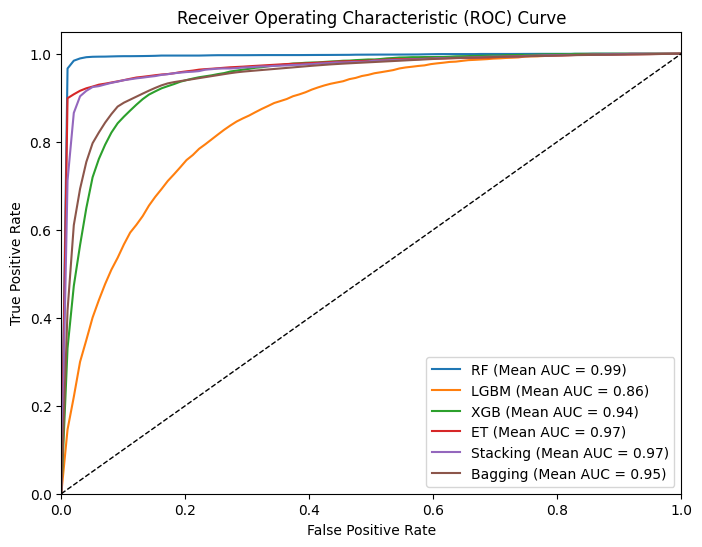

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined with your data

# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2 = LGBMClassifier(random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1, random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)
clf6= BaggingClassifier()

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = {'RF': clf1, 'LGBM': clf2, 'XGB': clf3, 'ET': clf4, 'Stacking': clf5, 'Bagging': clf6}

plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (Mean AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Cross Validation 5 Fold**

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value en

[LightGBM] [Info] Number of positive: 5954, number of negative: 9670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37063
[LightGBM] [Info] Number of data points in the train set: 15624, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381080 -> initscore=-0.484965
[LightGBM] [Info] Start training from score -0.484965


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5904, number of negative: 9721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37098
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377856 -> initscore=-0.498658
[LightGBM] [Info] Start training from score -0.498658


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5961, number of negative: 9664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37057
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381504 -> initscore=-0.483169
[LightGBM] [Info] Start training from score -0.483169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5926, number of negative: 9699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37078
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379264 -> initscore=-0.492673
[LightGBM] [Info] Start training from score -0.492673


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5911, number of negative: 9714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37073
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378304 -> initscore=-0.496753
[LightGBM] [Info] Start training from score -0.496753


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

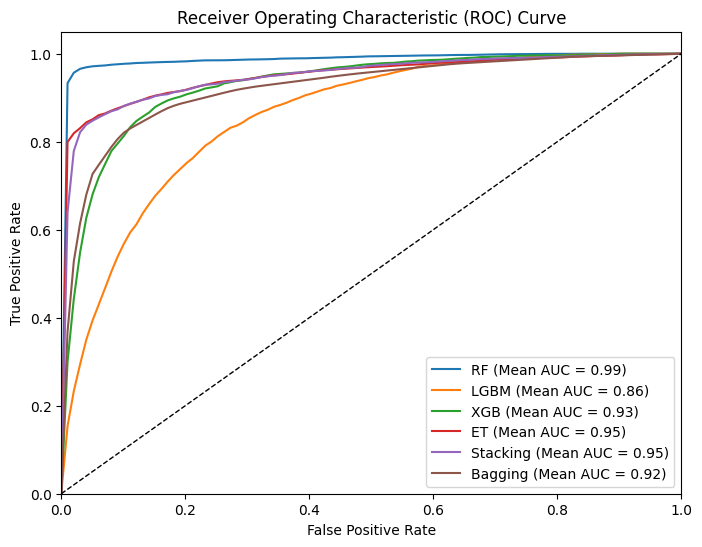

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined with your data

# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2 = LGBMClassifier(random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1, random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)
clf6= BaggingClassifier()

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = {'RF': clf1, 'LGBM': clf2, 'XGB': clf3, 'ET': clf4, 'Stacking': clf5, 'Bagging': clf6}

plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (Mean AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6 = BaggingClassifier(random_state=42)

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('et', clf4),('lgbm', clf2),('rf', clf1) ],final_estimator=lr)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation Random Forest
Fold : 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value en

Accuracy: 91.4
Sensitivity/Recall: 92.78
Specificity: 89.14
MCC: 0.81777
Precision: 93.32
F1_Score: 93.05
Fold : 2
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 3
Accuracy: 99.97
Sensitivity/Recall: 99.96
Specificity: 100.0
MCC: 0.99946
Precision: 100.0
F1_Score: 99.98
Fold : 4
Accuracy: 99.97
Sensitivity/Recall: 100.0
Specificity: 99.93
MCC: 0.99946
Precision: 99.96
F1_Score: 99.98
Fold : 5
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in 

In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation LGBM')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf2.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation LGBM
Fold : 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5931, number of negative: 9693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37070
[LightGBM] [Info] Number of data points in the train set: 15624, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379608 -> initscore=-0.491211
[LightGBM] [Info] Start training from score -0.491211


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 77.12
Sensitivity/Recall: 85.6
Specificity: 63.25
MCC: 0.50441
Precision: 79.2
F1_Score: 82.28
Fold : 2
[LightGBM] [Info] Number of positive: 5931, number of negative: 9694
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37070
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379584 -> initscore=-0.491314
[LightGBM] [Info] Start training from score -0.491314


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 77.73
Sensitivity/Recall: 85.89
Specificity: 64.4
MCC: 0.51814
Precision: 79.76
F1_Score: 82.71
Fold : 3
[LightGBM] [Info] Number of positive: 5931, number of negative: 9694
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37072
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379584 -> initscore=-0.491314
[LightGBM] [Info] Start training from score -0.491314


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 78.03
Sensitivity/Recall: 87.16
Specificity: 63.12
MCC: 0.52342
Precision: 79.43
F1_Score: 83.12
Fold : 4
[LightGBM] [Info] Number of positive: 5931, number of negative: 9694
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.122648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37062
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379584 -> initscore=-0.491314
[LightGBM] [Info] Start training from score -0.491314


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 77.98
Sensitivity/Recall: 86.67
Specificity: 63.79
MCC: 0.52288
Precision: 79.64
F1_Score: 83.01
Fold : 5
[LightGBM] [Info] Number of positive: 5932, number of negative: 9693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37074
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379648 -> initscore=-0.491043
[LightGBM] [Info] Start training from score -0.491043
Accuracy: 78.7
Sensitivity/Recall: 87.05
Specificity: 65.05
MCC: 0.53876
Precision: 80.29
F1_Score: 83.53


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation XGB')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf3.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation XGB
Fold : 1
Accuracy: 87.02
Sensitivity/Recall: 89.77
Specificity: 82.54
MCC: 0.7241
Precision: 89.36
F1_Score: 89.56
Fold : 2
Accuracy: 86.25
Sensitivity/Recall: 87.91
Specificity: 83.55
MCC: 0.71024
Precision: 89.72
F1_Score: 88.81
Fold : 3
Accuracy: 87.71
Sensitivity/Recall: 89.89
Specificity: 84.15
MCC: 0.73947
Precision: 90.26
F1_Score: 90.07
Fold : 4
Accuracy: 87.1
Sensitivity/Recall: 88.32
Specificity: 85.1
MCC: 0.72868
Precision: 90.64
F1_Score: 89.46
Fold : 5
Accuracy: 87.07
Sensitivity/Recall: 89.4
Specificity: 83.27
MCC: 0.72579
Precision: 89.73
F1_Score: 89.56


In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation ExtraTree')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf4.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation ExtraTree
Fold : 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 92.04
Sensitivity/Recall: 96.25
Specificity: 85.17
MCC: 0.83021
Precision: 91.38
F1_Score: 93.75
Fold : 2


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 91.63
Sensitivity/Recall: 96.08
Specificity: 84.36
MCC: 0.82139
Precision: 90.94
F1_Score: 93.44
Fold : 3


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 91.78
Sensitivity/Recall: 95.91
Specificity: 85.03
MCC: 0.82459
Precision: 91.28
F1_Score: 93.54
Fold : 4


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 92.19
Sensitivity/Recall: 96.29
Specificity: 85.5
MCC: 0.83346
Precision: 91.56
F1_Score: 93.87
Fold : 5
Accuracy: 92.09
Sensitivity/Recall: 97.32
Specificity: 83.54
MCC: 0.83212
Precision: 90.63
F1_Score: 93.86


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation Bagging')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf6.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


5-fold Cross-Validation Bagging
Fold : 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 88.05
Sensitivity/Recall: 90.92
Specificity: 83.34
MCC: 0.7454
Precision: 89.92
F1_Score: 90.42
Fold : 2


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 87.89
Sensitivity/Recall: 90.22
Specificity: 84.09
MCC: 0.74295
Precision: 90.26
F1_Score: 90.24
Fold : 3


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 87.99
Sensitivity/Recall: 91.37
Specificity: 82.47
MCC: 0.74367
Precision: 89.49
F1_Score: 90.42
Fold : 4


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 86.33
Sensitivity/Recall: 88.94
Specificity: 82.06
MCC: 0.70984
Precision: 89.01
F1_Score: 88.97
Fold : 5


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

Accuracy: 87.69
Sensitivity/Recall: 90.31
Specificity: 83.4
MCC: 0.73814
Precision: 89.9
F1_Score: 90.1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation Stacking')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf5.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation Stacking
Fold : 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5931, number of negative: 9693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37112
[LightGBM] [Info] Number of data points in the train set: 15624, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379608 -> initscore=-0.491211
[LightGBM] [Info] Start training from score -0.491211


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

[LightGBM] [Info] Number of positive: 4744, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36832
[LightGBM] [Info] Number of data points in the train set: 12499, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379550 -> initscore=-0.491457
[LightGBM] [Info] Start training from score -0.491457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36891
[LightGBM] [Info] Number of data points in the train set: 12499, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379630 -> initscore=-0.491117
[LightGBM] [Info] Start training from score -0.491117


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36932
[LightGBM] [Info] Number of data points in the train set: 12499, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379630 -> initscore=-0.491117
[LightGBM] [Info] Start training from score -0.491117


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36787
[LightGBM] [Info] Number of data points in the train set: 12499, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379630 -> initscore=-0.491117
[LightGBM] [Info] Start training from score -0.491117


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36913
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 92.58
Sensitivity/Recall: 97.94
Specificity: 83.82
MCC: 0.84313
Precision: 90.82
F1_Score: 94.25
Fold : 2


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5931, number of negative: 9694
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37132
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379584 -> initscore=-0.491314
[LightGBM] [Info] Start training from score -0.491314


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

[LightGBM] [Info] Number of positive: 4744, number of negative: 7756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36897
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379520 -> initscore=-0.491586
[LightGBM] [Info] Start training from score -0.491586


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36931
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36994
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36809
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36909
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 92.4
Sensitivity/Recall: 98.06
Specificity: 83.14
MCC: 0.83958
Precision: 90.48
F1_Score: 94.12
Fold : 3


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5931, number of negative: 9694
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37045
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379584 -> initscore=-0.491314
[LightGBM] [Info] Start training from score -0.491314


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

[LightGBM] [Info] Number of positive: 4744, number of negative: 7756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36832
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379520 -> initscore=-0.491586
[LightGBM] [Info] Start training from score -0.491586


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36814
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36841
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36778
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36866
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 92.81
Sensitivity/Recall: 98.23
Specificity: 83.95
MCC: 0.84831
Precision: 90.91
F1_Score: 94.43
Fold : 4


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5931, number of negative: 9694
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37053
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379584 -> initscore=-0.491314
[LightGBM] [Info] Start training from score -0.491314


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

[LightGBM] [Info] Number of positive: 4744, number of negative: 7756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36865
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379520 -> initscore=-0.491586
[LightGBM] [Info] Start training from score -0.491586


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36832
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36877
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36779
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36859
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 92.27
Sensitivity/Recall: 97.69
Specificity: 83.41
MCC: 0.83638
Precision: 90.59
F1_Score: 94.01
Fold : 5


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5932, number of negative: 9693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37153
[LightGBM] [Info] Number of data points in the train set: 15625, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379648 -> initscore=-0.491043
[LightGBM] [Info] Start training from score -0.491043


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: inv

[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36964
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4745, number of negative: 7755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36928
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379600 -> initscore=-0.491246
[LightGBM] [Info] Start training from score -0.491246


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4746, number of negative: 7754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36993
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379680 -> initscore=-0.490907
[LightGBM] [Info] Start training from score -0.490907


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4746, number of negative: 7754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36919
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379680 -> initscore=-0.490907
[LightGBM] [Info] Start training from score -0.490907


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4746, number of negative: 7754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36996
[LightGBM] [Info] Number of data points in the train set: 12500, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379680 -> initscore=-0.490907
[LightGBM] [Info] Start training from score -0.490907


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: Runtim

Accuracy: 93.06
Sensitivity/Recall: 98.56
Specificity: 84.08
MCC: 0.85408
Precision: 91.01
F1_Score: 94.63


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


# **Lazy Predict**

In [ ]:
pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the performance metrics
print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 5954, number of negative: 9670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29266
[LightGBM] [Info] Number of data points in the train set: 15624, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381080 -> initscore=-0.484965
[LightGBM] [Info] Start training from score -0.484965
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.92               0.90     0.90      0.92   
RandomForestClassifier             0.91               0.90     0.90      0.91   
BaggingClassifier                  0.87               0.86     0.86      0.87   
XGBClassifier                      0.85               0.84     0.84      0.85   
DecisionTreeClassifi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the performance metrics from LazyPredict
print(models)

# Choose the best classifier based on accuracy (first one in the list)
best_model_name = models.index[0]
best_model = clf.models[best_model_name]

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate specificity
# Specificity is calculated for each class, here we'll take the mean specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
tp = conf_matrix[1, 1]

specificity = tn / (tn + fp)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')

# Note: Specificity calculation is more meaningful for binary classification.
# For multi-class classification, you'd typically calculate specificity for each class.


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 5954, number of negative: 9670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29266
[LightGBM] [Info] Number of data points in the train set: 15624, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381080 -> initscore=-0.484965
[LightGBM] [Info] Start training from score -0.484965
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.92               0.90     0.90      0.92   
RandomForestClassifier             0.91               0.90     0.90      0.91   
BaggingClassifier                  0.87               0.86     0.86      0.87   
XGBClassifier                      0.85               0.84     0.84      0.85   
DecisionTreeClassifi

# **TSNE & Boundry----Graph**

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_scaled)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.999998927116394


In [ ]:
pca_result_50

array([[-1.51436090e+00, -1.00148916e-02, -5.27121186e-01, ...,
        -3.04970890e-05, -9.33557749e-05,  7.97361135e-05],
       [ 1.07888651e+00,  1.31763697e-01, -2.10423172e-02, ...,
        -9.65399668e-05,  1.36001036e-04,  4.41148877e-05],
       [-1.54598010e+00,  5.97968102e-02, -3.90224069e-01, ...,
        -1.20009296e-04, -4.12836671e-05,  2.60084867e-04],
       ...,
       [ 1.07771337e+00,  1.32860661e-01, -1.81554556e-02, ...,
        -2.30084173e-04, -2.80220062e-04, -4.52086329e-04],
       [-1.51419818e+00, -1.00928545e-02, -5.27479053e-01, ...,
         2.40058638e-04,  2.84809619e-04,  1.41382217e-04],
       [-1.71102750e+00,  4.30478096e-01,  3.37021381e-01, ...,
         3.51304188e-04,  2.51742080e-04,  4.08262014e-04]], dtype=float32)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 101.64662098884583 seconds


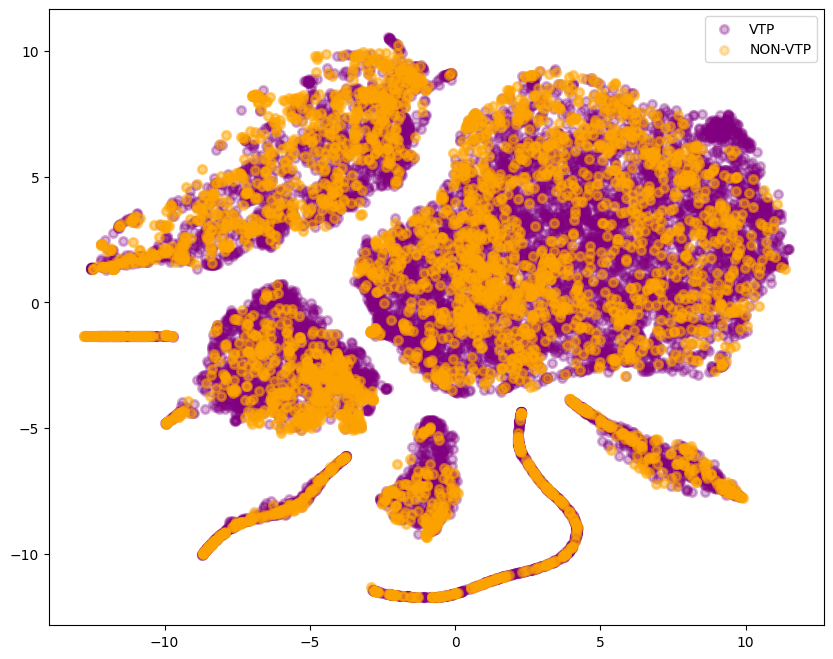

In [ ]:
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange' ]
label = ['VTP','NON-VTP' ]
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

[LightGBM] [Info] Number of positive: 29, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483333 -> initscore=-0.066691
[LightGBM] [Info] Start training from score -0.066691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

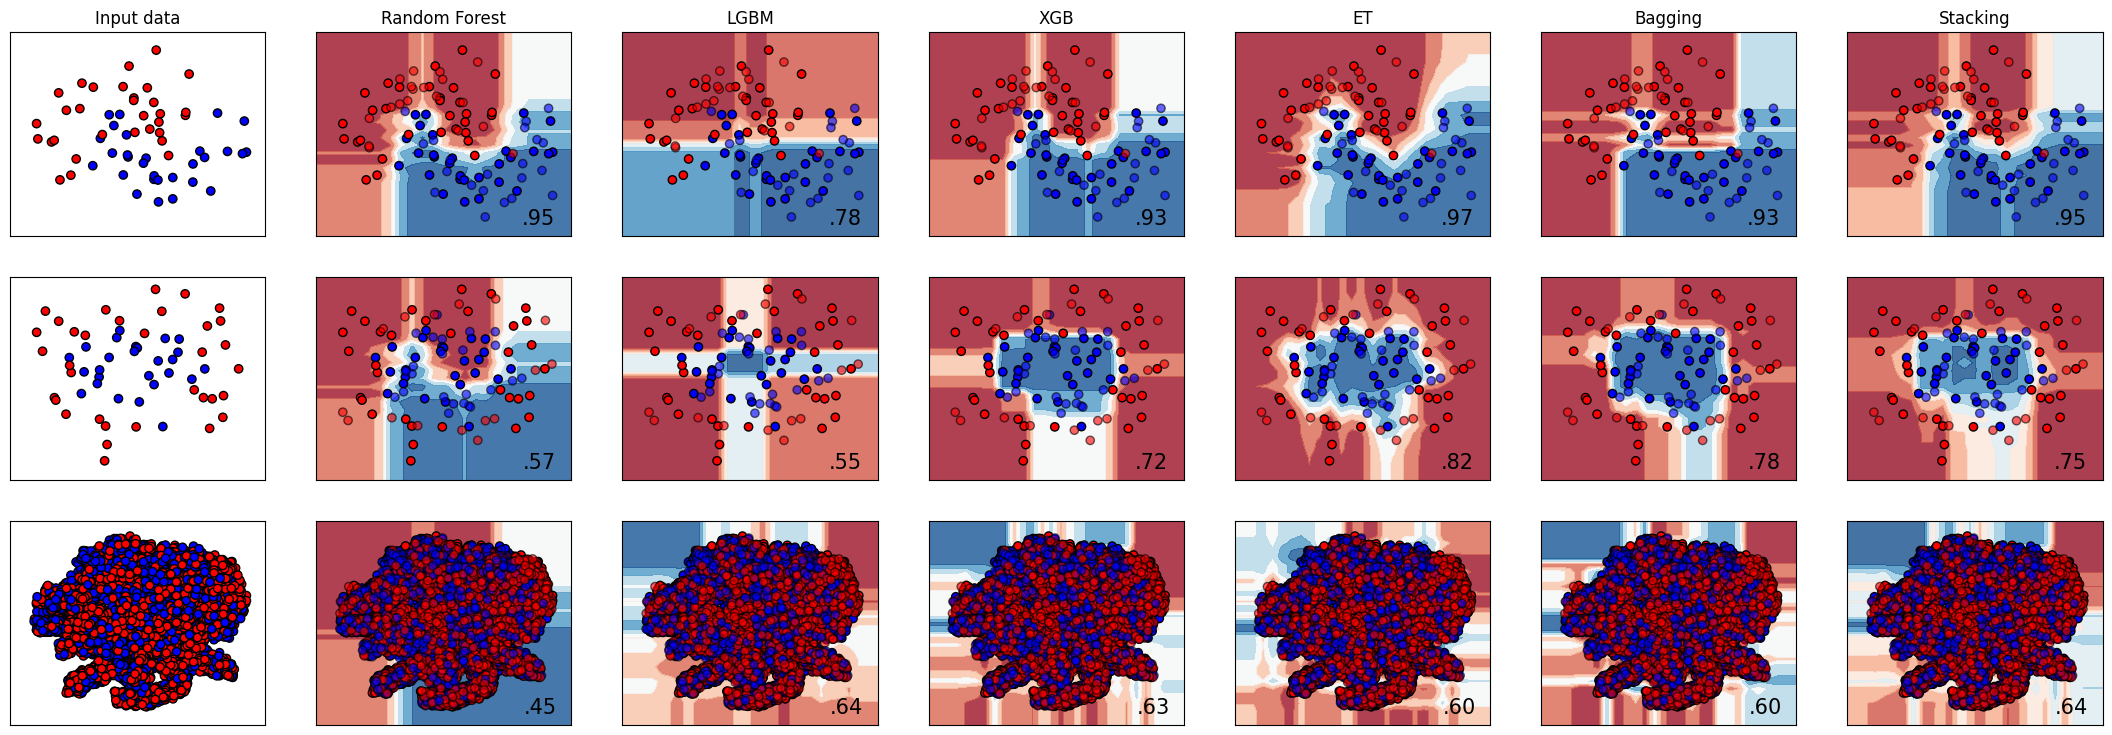

<Figure size 12000x12000 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

h=0.2
names = [
    "Random Forest",
    "LGBM",
    "XGB",
    "ET",
    "Bagging",
    "Stacking"
]
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = [
    RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True),
   LGBMClassifier(),
    XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1),
    ExtraTreesClassifier(),
     BaggingClassifier(),
    clf5
]

X, y =  tsne_pca_results,y
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

         # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
plt.figure(figsize=(20, 20), dpi=600)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_scaled and y are your preprocessed features and target variable
rf = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
cv_scores = cross_val_score(rf, X_scaled, y, cv=5)

# Print the scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

# Print the mean and standard deviation of the scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print(f"Mean accuracy: {mean_cv_score:.4f}")
print(f"Standard deviation: {std_cv_score:.4f}")

# Check if the mean and std align with expected values
expected_mean = 0.9403
expected_std = 0.0096

print(f"Expected Mean: {expected_mean:.4f}, Expected Standard Deviation: {expected_std:.4f}")


Cross-validation scores for each fold: [0.96083952 0.93855607 0.9546851  0.9421403  0.95519713]
Mean accuracy: 0.9503
Standard deviation: 0.0085
Expected Mean: 0.9403, Expected Standard Deviation: 0.0096


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Example preprocessing steps
# Replace this with your actual preprocessing steps
def preprocess_data():
    # Example data, replace with your actual data
    X = np.random.rand(1000, 20)  # Replace with actual features
    y = np.random.randint(0, 2, 1000)  # Replace with actual labels
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# Preprocess data
X_scaled, y = preprocess_data()

# Initialize model
rf = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5)

# Print the scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

# Print the mean and standard deviation of the scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print(f"Mean accuracy: {mean_cv_score:.4f}")
print(f"Standard deviation: {std_cv_score:.4f}")

# Expected values
expected_mean = 0.9403
expected_std = 0.0096
print(f"Expected Mean: {expected_mean:.4f}, Expected Standard Deviation: {expected_std:.4f}")


Cross-validation scores for each fold: [0.465 0.515 0.515 0.565 0.475]
Mean accuracy: 0.5070
Standard deviation: 0.0354
Expected Mean: 0.9403, Expected Standard Deviation: 0.0096


In [ ]:
from sklearn.model_selection import cross_val_score
cv=5


In [ ]:
et=cross_val_score(ExtraTreesClassifier(), X_scaled, y, cv=cv)

In [ ]:
et

array([0.535, 0.43 , 0.54 , 0.49 , 0.49 ])

In [ ]:
rf=cross_val_score(RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42),X_scaled, y, cv=cv)

In [ ]:
rf

array([0.465, 0.515, 0.515, 0.565, 0.475])

In [ ]:
xgb=cross_val_score(XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1),X_scaled, y, cv=cv)

In [ ]:
xgb

In [ ]:
bg=cross_val_score(BaggingClassifier(), X_scaled, y, cv=cv)

In [ ]:
bg

In [ ]:
lgbm=cross_val_score(LGBMClassifier(), X_scaled, y, cv=cv)

In [ ]:
lgbm

In [ ]:
lr=cross_val_score(LogisticRegression(), X_scaled, y, cv=cv)

In [ ]:
lr

In [ ]:
# Define your meta-learner
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2=LogisticRegression()
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6= BaggingClassifier()
lr = LogisticRegression(random_state=42)
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
st=cross_val_score(clf5, X_scaled, y, cv=cv)


In [ ]:
# Key Changes for Colored Violins and Legend
unique_algos = v10['algo'].unique()
palette = seaborn.color_palette("husl", len(unique_algos))  # Choose a color palette

for i, algo in enumerate(unique_algos):
    algo_data = v10[v10['algo'] == algo]  # Filter data for this algorithm
    seaborn.violinplot(
        ax=ax,
        y=algo_data["Accuracy"],
        x=algo_data["folds"],
        color=palette[i],  # Assign a unique color
    )

Word Cloud

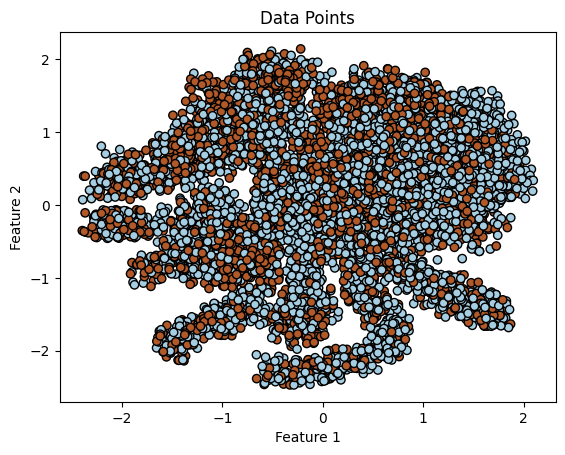

In [ ]:

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Plot decision boundary (Random Forest doesn't have a clear decision boundary like SVC)
def plot_decision_boundary(clf, X, y):
    # No decision boundary to plot for Random Forest
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Points')
    plt.show()

plot_decision_boundary(clf, X_test, y_test)

In [ ]:
seed = np.random.seed(5)
inputSize=153
dataset = pd.read_csv('/content/drive/MyDrive/vesicularnew.csv', sep=',', header=None)
#dataset=pd.read_csv('/content/drive/MyDrive/alz-balance-FV.csv', sep=',',header=None)
dataset = dataset.replace([np.inf, -np.inf], np.nan)
dataset = dataset.fillna(0)

for col in dataset.columns:
    dataset[col].where(dataset[col].notnull(), 0, inplace=True)

In [ ]:
import pandas as pd

def replace_text_in_dataframe(text, replacement, dataframe):
    return dataframe.applymap(lambda x: replacement if str(x) == text else x)

search_text = '#NAME?'
replacement = 0
df_replaced = replace_text_in_dataframe(search_text, replacement, dataset)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df_replaced.columns = ['col' + str(i) for i in range(1, 155)]

# Now your columns will be named col1, col2, ..., col522
df_replaced.head()  # Display the first few rows to verify the changes
df_replaced=df_replaced.drop(0)
df_replaced

col1    col2     col3        col4    col5     col6        col7  \
1       2072   16331   166545  1907687.00   15101   119221  1219623.00   
2       8468  130589  2653849 60800129.00  127561  1970011 40022183.00   
3       2011   15938   163606  1891436.00   14974   117401  1201633.00   
4       2183   17447   177697  2036141.00   16326   130036  1316434.00   
5       1877   14058   135606  1475946.00   13870   104410  1008472.00   
...      ...     ...      ...         ...     ...      ...         ...   
19526   5338   63507   979533 17017587.00   61542   728141 11179755.00   
19527   6300   80562  1355358 25803402.00   75837   958826 16123752.00   
19528   3566   33758   414642  5708132.00   34071   318805  3863143.00   
19529   8109  116728  2212732 47259712.00  113935  1623486 30718450.00   
19530  10013  161155  3392983 80238535.00  151048  2423081 50911181.00   

          col8        col9       col10  ...  col145  col146  col147  col148  \
1       141765  1106515.00  1500911.00  ...      93     670     903    1981   
2      2492137 38331067.00 54634735.00  ...    7826   37271   21978   24028   
3       142006  1090345.00  1514074.00  ...      20     526    1314    1185   
4       159294  1269406.00  1756932.00  ...     708    1599     562    2476   
5       132404   998868.00  1426690.00  ...     671     476     717    1223   
...        ...         ...         ...  ...     ...     ...     ...     ...   
19526   925556 10904695.00 15673440.00  ...    8626    3389    5160   10719   
19527  1203245 15085568.00 21587997.00  ...    6986    5351   10457   25209   
19528   417987  3903673.00  5729847.00  ...    1543    1362    1887    3313   
19529  2097625 29592768.00 43448167.00  ...   10284   10175   14727   40516   
19530  2992454 47930373.00 66853438.00  ...   26664   13264   20389   61181   

       col149  col150  col151  col152  col153  col154  
1        1310     965     248    1214       0       1  
2       13311   19602    3188    5628       0       1  
3        1415     869     244     735       0       1  
4        1238    1838     246     801       0       1  
5        1053    1439     232     511       0       1  
...       ...     ...     ...     ...     ...     ...  
19526    6845    6388    1326    4787       0       1  
19527    7145    8394    1050    4964       0       1  
19528    2826    2971    1292    4072       0       1  
19529   15821   26906    2765    8221       0       1  
19530   21885   36453    4192   13420       0       1  

[19530 rows x 154 columns]

In [ ]:
X1 = df_replaced.iloc[:, : inputSize]
Y1 = df_replaced.iloc[:, inputSize: inputSize+1]
# dataset
X1 = X1.to_numpy()
Y1 = Y1.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

std_scale = MinMaxScaler()
X1 = np.nan_to_num(X1.astype('float32'))
X1 = std_scale.fit_transform(X1)

In [ ]:
df_replaced

col1    col2     col3        col4    col5     col6        col7  \
1       2072   16331   166545  1907687.00   15101   119221  1219623.00   
2       8468  130589  2653849 60800129.00  127561  1970011 40022183.00   
3       2011   15938   163606  1891436.00   14974   117401  1201633.00   
4       2183   17447   177697  2036141.00   16326   130036  1316434.00   
5       1877   14058   135606  1475946.00   13870   104410  1008472.00   
...      ...     ...      ...         ...     ...      ...         ...   
19526   5338   63507   979533 17017587.00   61542   728141 11179755.00   
19527   6300   80562  1355358 25803402.00   75837   958826 16123752.00   
19528   3566   33758   414642  5708132.00   34071   318805  3863143.00   
19529   8109  116728  2212732 47259712.00  113935  1623486 30718450.00   
19530  10013  161155  3392983 80238535.00  151048  2423081 50911181.00   

          col8        col9       col10  ...  col145  col146  col147  col148  \
1       141765  1106515.00  1500911.00  ...      93     670     903    1981   
2      2492137 38331067.00 54634735.00  ...    7826   37271   21978   24028   
3       142006  1090345.00  1514074.00  ...      20     526    1314    1185   
4       159294  1269406.00  1756932.00  ...     708    1599     562    2476   
5       132404   998868.00  1426690.00  ...     671     476     717    1223   
...        ...         ...         ...  ...     ...     ...     ...     ...   
19526   925556 10904695.00 15673440.00  ...    8626    3389    5160   10719   
19527  1203245 15085568.00 21587997.00  ...    6986    5351   10457   25209   
19528   417987  3903673.00  5729847.00  ...    1543    1362    1887    3313   
19529  2097625 29592768.00 43448167.00  ...   10284   10175   14727   40516   
19530  2992454 47930373.00 66853438.00  ...   26664   13264   20389   61181   

       col149  col150  col151  col152  col153  col154  
1        1310     965     248    1214       0       1  
2       13311   19602    3188    5628       0       1  
3        1415     869     244     735       0       1  
4        1238    1838     246     801       0       1  
5        1053    1439     232     511       0       1  
...       ...     ...     ...     ...     ...     ...  
19526    6845    6388    1326    4787       0       1  
19527    7145    8394    1050    4964       0       1  
19528    2826    2971    1292    4072       0       1  
19529   15821   26906    2765    8221       0       1  
19530   21885   36453    4192   13420       0       1  

[19530 rows x 154 columns]

In [ ]:
dataset

0       1        2           3       4        5           6    \
0       7380  106827  2040383 43750419.00  102012  1480599 28416725.00   
1       2072   16331   166545  1907687.00   15101   119221  1219623.00   
2       8468  130589  2653849 60800129.00  127561  1970011 40022183.00   
3       2011   15938   163606  1891436.00   14974   117401  1201633.00   
4       2183   17447   177697  2036141.00   16326   130036  1316434.00   
...      ...     ...      ...         ...     ...      ...         ...   
19526   5338   63507   979533 17017587.00   61542   728141 11179755.00   
19527   6300   80562  1355358 25803402.00   75837   958826 16123752.00   
19528   3566   33758   414642  5708132.00   34071   318805  3863143.00   
19529   8109  116728  2212732 47259712.00  113935  1623486 30718450.00   
19530  10013  161155  3392983 80238535.00  151048  2423081 50911181.00   

           7           8           9    ...    144    145    146    147  \
0      1841064 26611391.00 37384158.00  ...  20102   7160  19373  18658   
1       141765  1106515.00  1500911.00  ...     93    670    903   1981   
2      2492137 38331067.00 54634735.00  ...   7826  37271  21978  24028   
3       142006  1090345.00  1514074.00  ...     20    526   1314   1185   
4       159294  1269406.00  1756932.00  ...    708   1599    562   2476   
...        ...         ...         ...  ...    ...    ...    ...    ...   
19526   925556 10904695.00 15673440.00  ...   8626   3389   5160  10719   
19527  1203245 15085568.00 21587997.00  ...   6986   5351  10457  25209   
19528   417987  3903673.00  5729847.00  ...   1543   1362   1887   3313   
19529  2097625 29592768.00 43448167.00  ...  10284  10175  14727  40516   
19530  2992454 47930373.00 66853438.00  ...  26664  13264  20389  61181   

         148    149   150    151  152  153  
0      11188  20515  6810   6354    0    1  
1       1310    965   248   1214    0    1  
2      13311  19602  3188   5628    0    1  
3       1415    869   244    735    0    1  
4       1238   1838   246    801    0    1  
...      ...    ...   ...    ...  ...  ...  
19526   6845   6388  1326   4787    0    1  
19527   7145   8394  1050   4964    0    1  
19528   2826   2971  1292   4072    0    1  
19529  15821  26906  2765   8221    0    1  
19530  21885  36453  4192  13420    0    1  

[19531 rows x 154 columns]

In [ ]:
# train=pd.read_csv('trainHYBRID.csv')
# test=pd.read_csv('testHYBRID.csv')
# y_train=train['class']
# X_train=train.drop(['Unnamed: 0','class'],axis=1)
# y_test=test['class']
# X_test=test.drop(['Unnamed: 0','class'],axis=1)

In [ ]:
 X = X1

In [ ]:
X

array([[5.5178502e-03, 4.7615473e-04, 3.9315841e-05, ..., 3.4557488e-05,
        7.6661017e-05, 0.0000000e+00],
       [2.3163937e-02, 3.8431857e-03, 6.2838651e-04, ..., 4.4423091e-04,
        3.5539392e-04, 0.0000000e+00],
       [5.3495555e-03, 4.6457353e-04, 3.8619797e-05, ..., 3.4000110e-05,
        4.6413385e-05, 0.0000000e+00],
       ...,
       [9.6396841e-03, 9.8970521e-04, 9.8072902e-05, ..., 1.8003336e-04,
        2.5713645e-04, 0.0000000e+00],
       [2.2173483e-02, 3.4347204e-03, 5.2391633e-04, ..., 3.8528812e-04,
        5.1913527e-04, 0.0000000e+00],
       [2.7426476e-02, 4.7439248e-03, 8.0343639e-04, ..., 5.8413303e-04,
        8.4743893e-04, 0.0000000e+00]], dtype=float32)

In [ ]:
len(X)

19530

In [ ]:
y = Y1
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
len(y)


19530

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9999988675117493


In [ ]:
pca_result_50

array([[ 1.07880938e+00,  1.31763697e-01, -2.10382640e-02, ...,
        -1.05785206e-04,  1.00261532e-04,  1.13897026e-04],
       [-1.54604614e+00,  5.97964525e-02, -3.90294552e-01, ...,
        -1.04596838e-04, -8.81357118e-05,  2.10221857e-04],
       [ 1.07892823e+00,  1.31624222e-01, -2.13506520e-02, ...,
         3.29036266e-05,  2.27345154e-05,  1.09169632e-04],
       ...,
       [ 1.07763612e+00,  1.32860661e-01, -1.81511045e-02, ...,
        -2.39843503e-04,  2.72840261e-05, -5.30228019e-04],
       [-1.51426017e+00, -1.00927353e-02, -5.27547956e-01, ...,
         2.13177875e-04,  1.78849325e-04,  2.75950879e-04],
       [-1.71111512e+00,  4.30475712e-01,  3.36944848e-01, ...,
         3.43048945e-04,  1.61399134e-04,  5.22278249e-04]], dtype=float32)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 113.37507486343384 seconds


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming tsne_pca_results is a 2D array with shape (n_samples, 2)
# and y is a 1D array with shape (n_samples,)
# Replace the following lines with your actual data
n_samples = 1000
tsne_pca_results = np.random.rand(n_samples, 2)
y = np.random.randint(0, 2, size=n_samples)

target_ids = range(len(np.unique(y)))

plt.figure(figsize=(10, 8))
colours = ['purple', 'orange']
labels = ['TE', 'NON-TE']

for i, c, label in zip(target_ids, colours, labels):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths=2)

plt.legend()
plt.title('t-SNE visualization of the dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()


In [ ]:
print(len(tsne_pca_results))
print(len(y))


In [ ]:
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange','g','yellow','red','black','m','r','y','teal','pink','green','y']
label = ['Copia','Gypsy','Pao','Line','L1','Sine','Harbinger','hAt','Mutator','Tc-Marnier','Cacta','Mite','Heli']
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

h=0.2
names = [
    "Random Forest",
    "Bagging",
    "ET",
    "XGB",
    "LR",
]
from sklearn.linear_model import LogisticRegression

classifiers = [
    RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1),
LogisticRegression()
]

X, y =  tsne_pca_results,y
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

         # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
plt.figure(figsize=(20, 20), dpi=600)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

h=0.2
xgbst=XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
etst=ExtraTreesClassifier()
rfst=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
bg=BaggingClassifier()
lsvc=LinearSVC()

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner

str = StackingClassifier(
    estimators=[('xgb', xgbst),('et', etst),('LSVC', lsvc),('rf', rfst) ],final_estimator=lr)


names = [
    "Random Forest",
    "ET",
    "Bagging",
    "XGB",
    "LR",
    "Stacking",
]
from sklearn.linear_model import LogisticRegression

classifiers = [
    RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1) ,
    LogisticRegression(random_state=42),
    st
]

X, y =  tsne_pca_results,y
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

         # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
plt.figure(figsize=(20, 20), dpi=600)

plt.tight_layout()
plt.show()

In [ ]:
# Correction
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.svm import LinearSVC

# Parameters for visualization
h = 0.2  # Step size in the mesh

# Define classifiers
xgbst = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
etst = ExtraTreesClassifier()
rfst = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
bg = BaggingClassifier()
lsvc = LinearSVC()

# Define meta-learner
lr = LogisticRegression(random_state=42)

# Define stacking classifier
str_clf = StackingClassifier(
    estimators=[('xgb', xgbst), ('et', etst), ('LSVC', lsvc), ('rf', rfst)],
    final_estimator=lr
)

# Names of the classifiers
names = [
    "Random Forest",
    "ET",
    "Bagging",
    "XGB",
    "LR",
    "Stacking"
]

classifiers = [
    rfst,
    etst,
    bg,
    xgbst,
    LogisticRegression(random_state=42),
    str_clf
]

# Generate some example data
X, y = np.random.rand(100, 2), np.random.randint(0, 2, 100)

# Randomly generate additional datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    (X, y)
]

# Create the figure
figure = plt.figure(figsize=(27, 9))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset, split into training and test parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - 0.3, yy.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()


In [ ]:
sns.scatterplot(
    x=tsne_pca_results[:, 0], y=tsne_pca_results[:, 1],
    hue=y,
    data=X,
    legend="full",
    alpha=0.3
).set(title="Feature Space Visualization of Raw Data")

Voilen Chart

In [ ]:
seed = np.random.seed(5)
inputSize=153
dataset = pd.read_csv('/content/drive/MyDrive/vesicularnew.csv', sep=',', header=None)
#dataset=pd.read_csv('/content/drive/MyDrive/vesicularnew.csv', sep=',',header=None)
dataset = dataset.replace([np.inf, -np.inf], np.nan)
dataset = dataset.fillna(0)

for col in dataset.columns:
    dataset[col].where(dataset[col].notnull(), 0, inplace=True)

In [ ]:
import csv
import numpy as np
from sklearn import decomposition
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier, Perceptron
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
len(dataset)

In [ ]:
X

In [ ]:
import pandas as pd

def replace_text_in_dataframe(text, replacement, dataframe):
    return dataframe.applymap(lambda x: replacement if str(x) == text else x)

search_text = '#NAME?'
replacement = 0
df_replaced = replace_text_in_dataframe(search_text, replacement, dataset)
# print(df_replaced)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df_replaced.columns = ['col' + str(i) for i in range(1, 524)]

# Now your columns will be named col1, col2, ..., col522
df_replaced.head()  # Display the first few rows to verify the changes
df_replaced=df_replaced.drop(0)
df_replaced

In [ ]:
X1 = df_replaced.iloc[:, : inputSize]
Y1 = df_replaced.iloc[:, inputSize: inputSize+1]
# dataset
X1 = X1.to_numpy()
Y1 = Y1.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

std_scale = MinMaxScaler()
X1 = np.nan_to_num(X1.astype('float32'))
X1 = std_scale.fit_transform(X1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
len(X1)

In [ ]:
from sklearn.model_selection import cross_val_score
cv=5

In [ ]:
from sklearn.model_selection import cross_val_score
cv=5
lgbm=cross_val_score(LGBMClassifier(), X, y, cv=cv)
et=cross_val_score(ExtraTreesClassifier(),X, y, cv=cv)
rf=cross_val_score(RandomForestClassifier(),X, y, cv=cv)
xgb=cross_val_score(XGBClassifier(),X, y, cv=cv)
bg=BaggingClassifier()
lsvc=LinearSVC()
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner

st = StackingClassifier(
    estimators=[('xgb', xgbst),('et', etst),('LSVC', lsvc),('rf', rfst) ],final_estimator=lr)

In [ ]:
lgbm

In [ ]:
et

In [ ]:
xgb

In [ ]:
rf

In [ ]:
st5=cross_val_score(st,X, y, cv=cv)

In [ ]:
st5

<Axes: xlabel='folds', ylabel='Accuracy'>

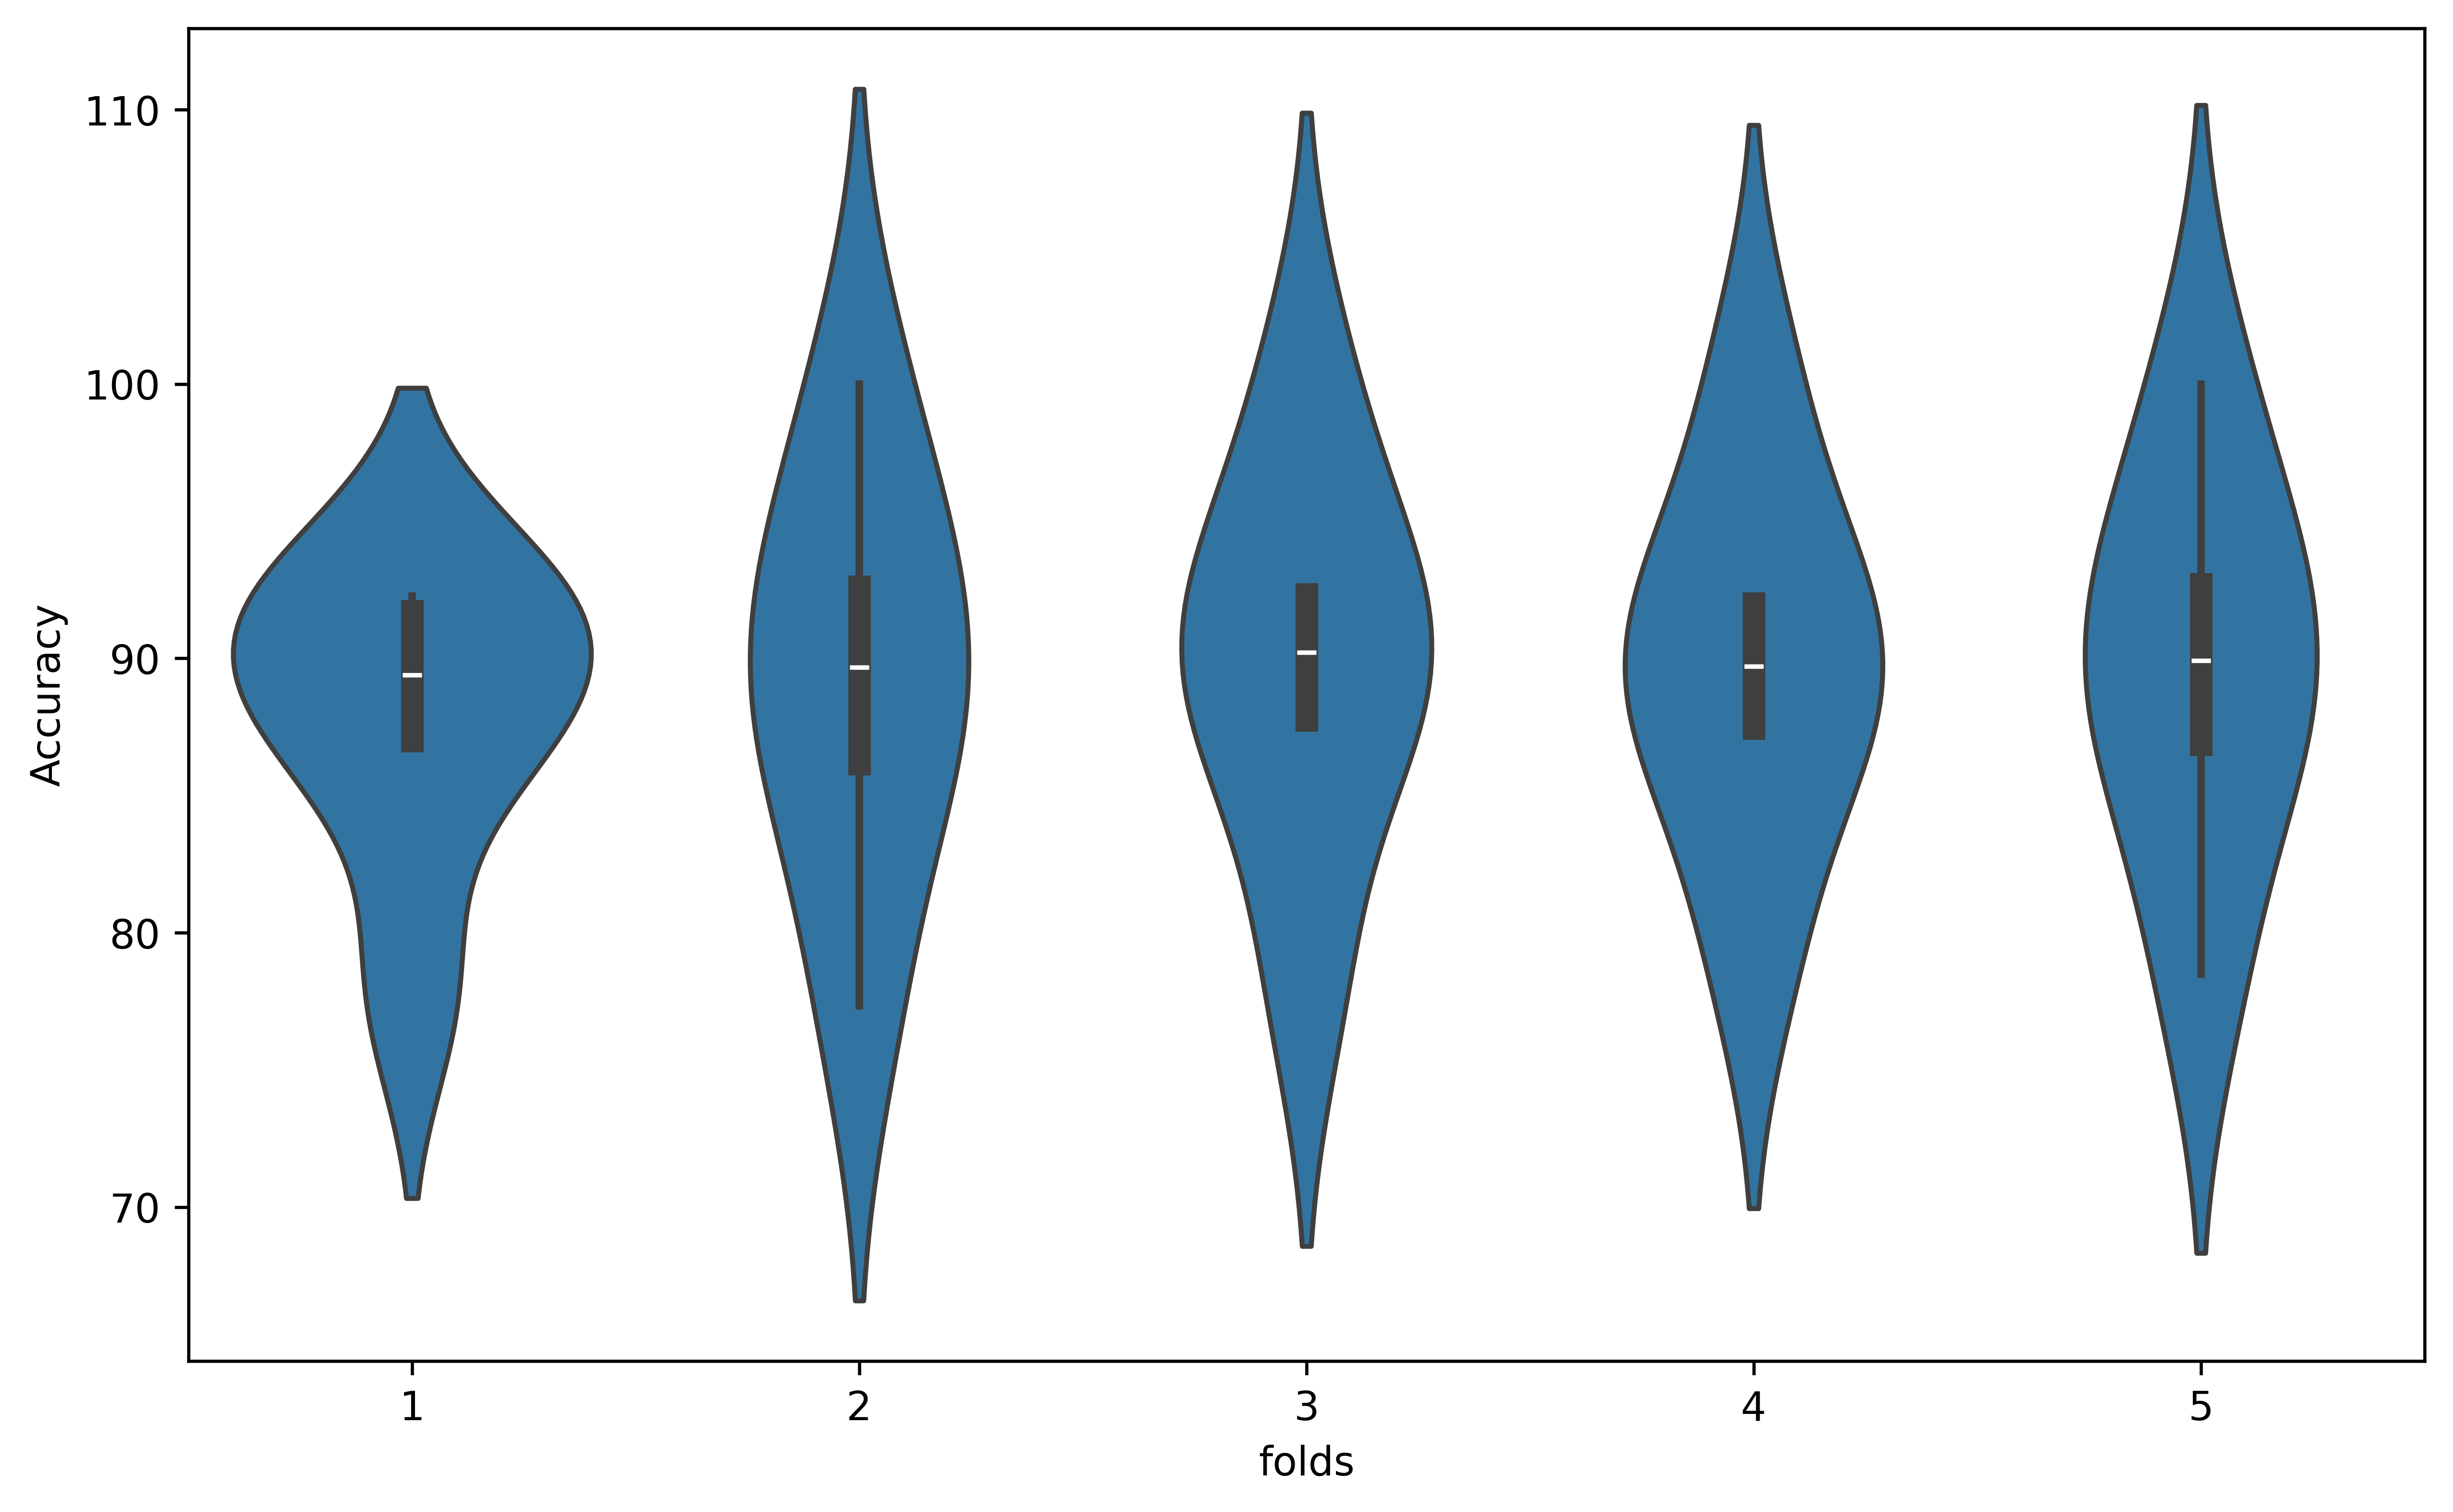

In [ ]:

# svc=cross_val_score(SVC(probability=True),X, y, cv=cv)
# st=cross_val_predict(MLPClassifier(), X, y,cv=cv,method='predict_proba')


import numpy as np
#lst_accu_stratifiedlgbm5.append(np.mean(lst_accu_stratifiedlgbm5))
st10 = {'Accuracy':[92.27, 92.4, 92.37, 91.88, 92.73],
        'folds': [1,2,3,4,5],
      'algo': 'Ensemble'}
st10=pd.DataFrame(st10)

rf10 = {'Accuracy':[91.25, 100.0, 99.97, 99.95, 100.0],
        'folds': [1,2,3,4,5],
      'algo': 'rf'}
rf10=pd.DataFrame(rf10)


lgbm10 = {'Accuracy':[77.91, 77.34, 78.49, 79.44, 78.49 ],
        'folds': [1,2,3,4,5],
      'algo': 'lgbm'}
lgbm10=pd.DataFrame(lgbm10)


xgb10 = {'Accuracy':[86.82, 85.89, 87.61, 87.53, 87.22 ],
        'folds': [1,2,3,4,5],
      'algo': 'ridge'}
xgb10=pd.DataFrame(xgb10)


# svm10 = {'Accuracy':[0.50810811, 0.57297297, 0.56216216, 0.47567568, 0.61413043],
#         'folds': [1,2,3,4,5],
#       'algo': 'svm'}
# svm10=pd.DataFrame(svm10)


et10 = {'Accuracy':[91.89, 92.7, 92.27, 92.04, 92.63],
        'folds': [1,2,3,4,5],
      'algo': 'et'}
et10=pd.DataFrame(et10)



bg10 = {'Accuracy':[87.54, 86.94, 88.17, 87.43, 86.74 ],
        'folds': [1,2,3,4,5],
      'algo': 'bg'}
bg10=pd.DataFrame(bg10)

v10 = pd.concat([rf10,et10,lgbm10,xgb10,st10,bg10], axis=0)





from matplotlib import pyplot
import seaborn
#import mylib
a4_dims = (10, 6)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims,dpi=600)
seaborn.violinplot(ax=ax, y=v10["Accuracy"], x=v10["folds"])



<Axes: xlabel='folds', ylabel='Accuracy'>

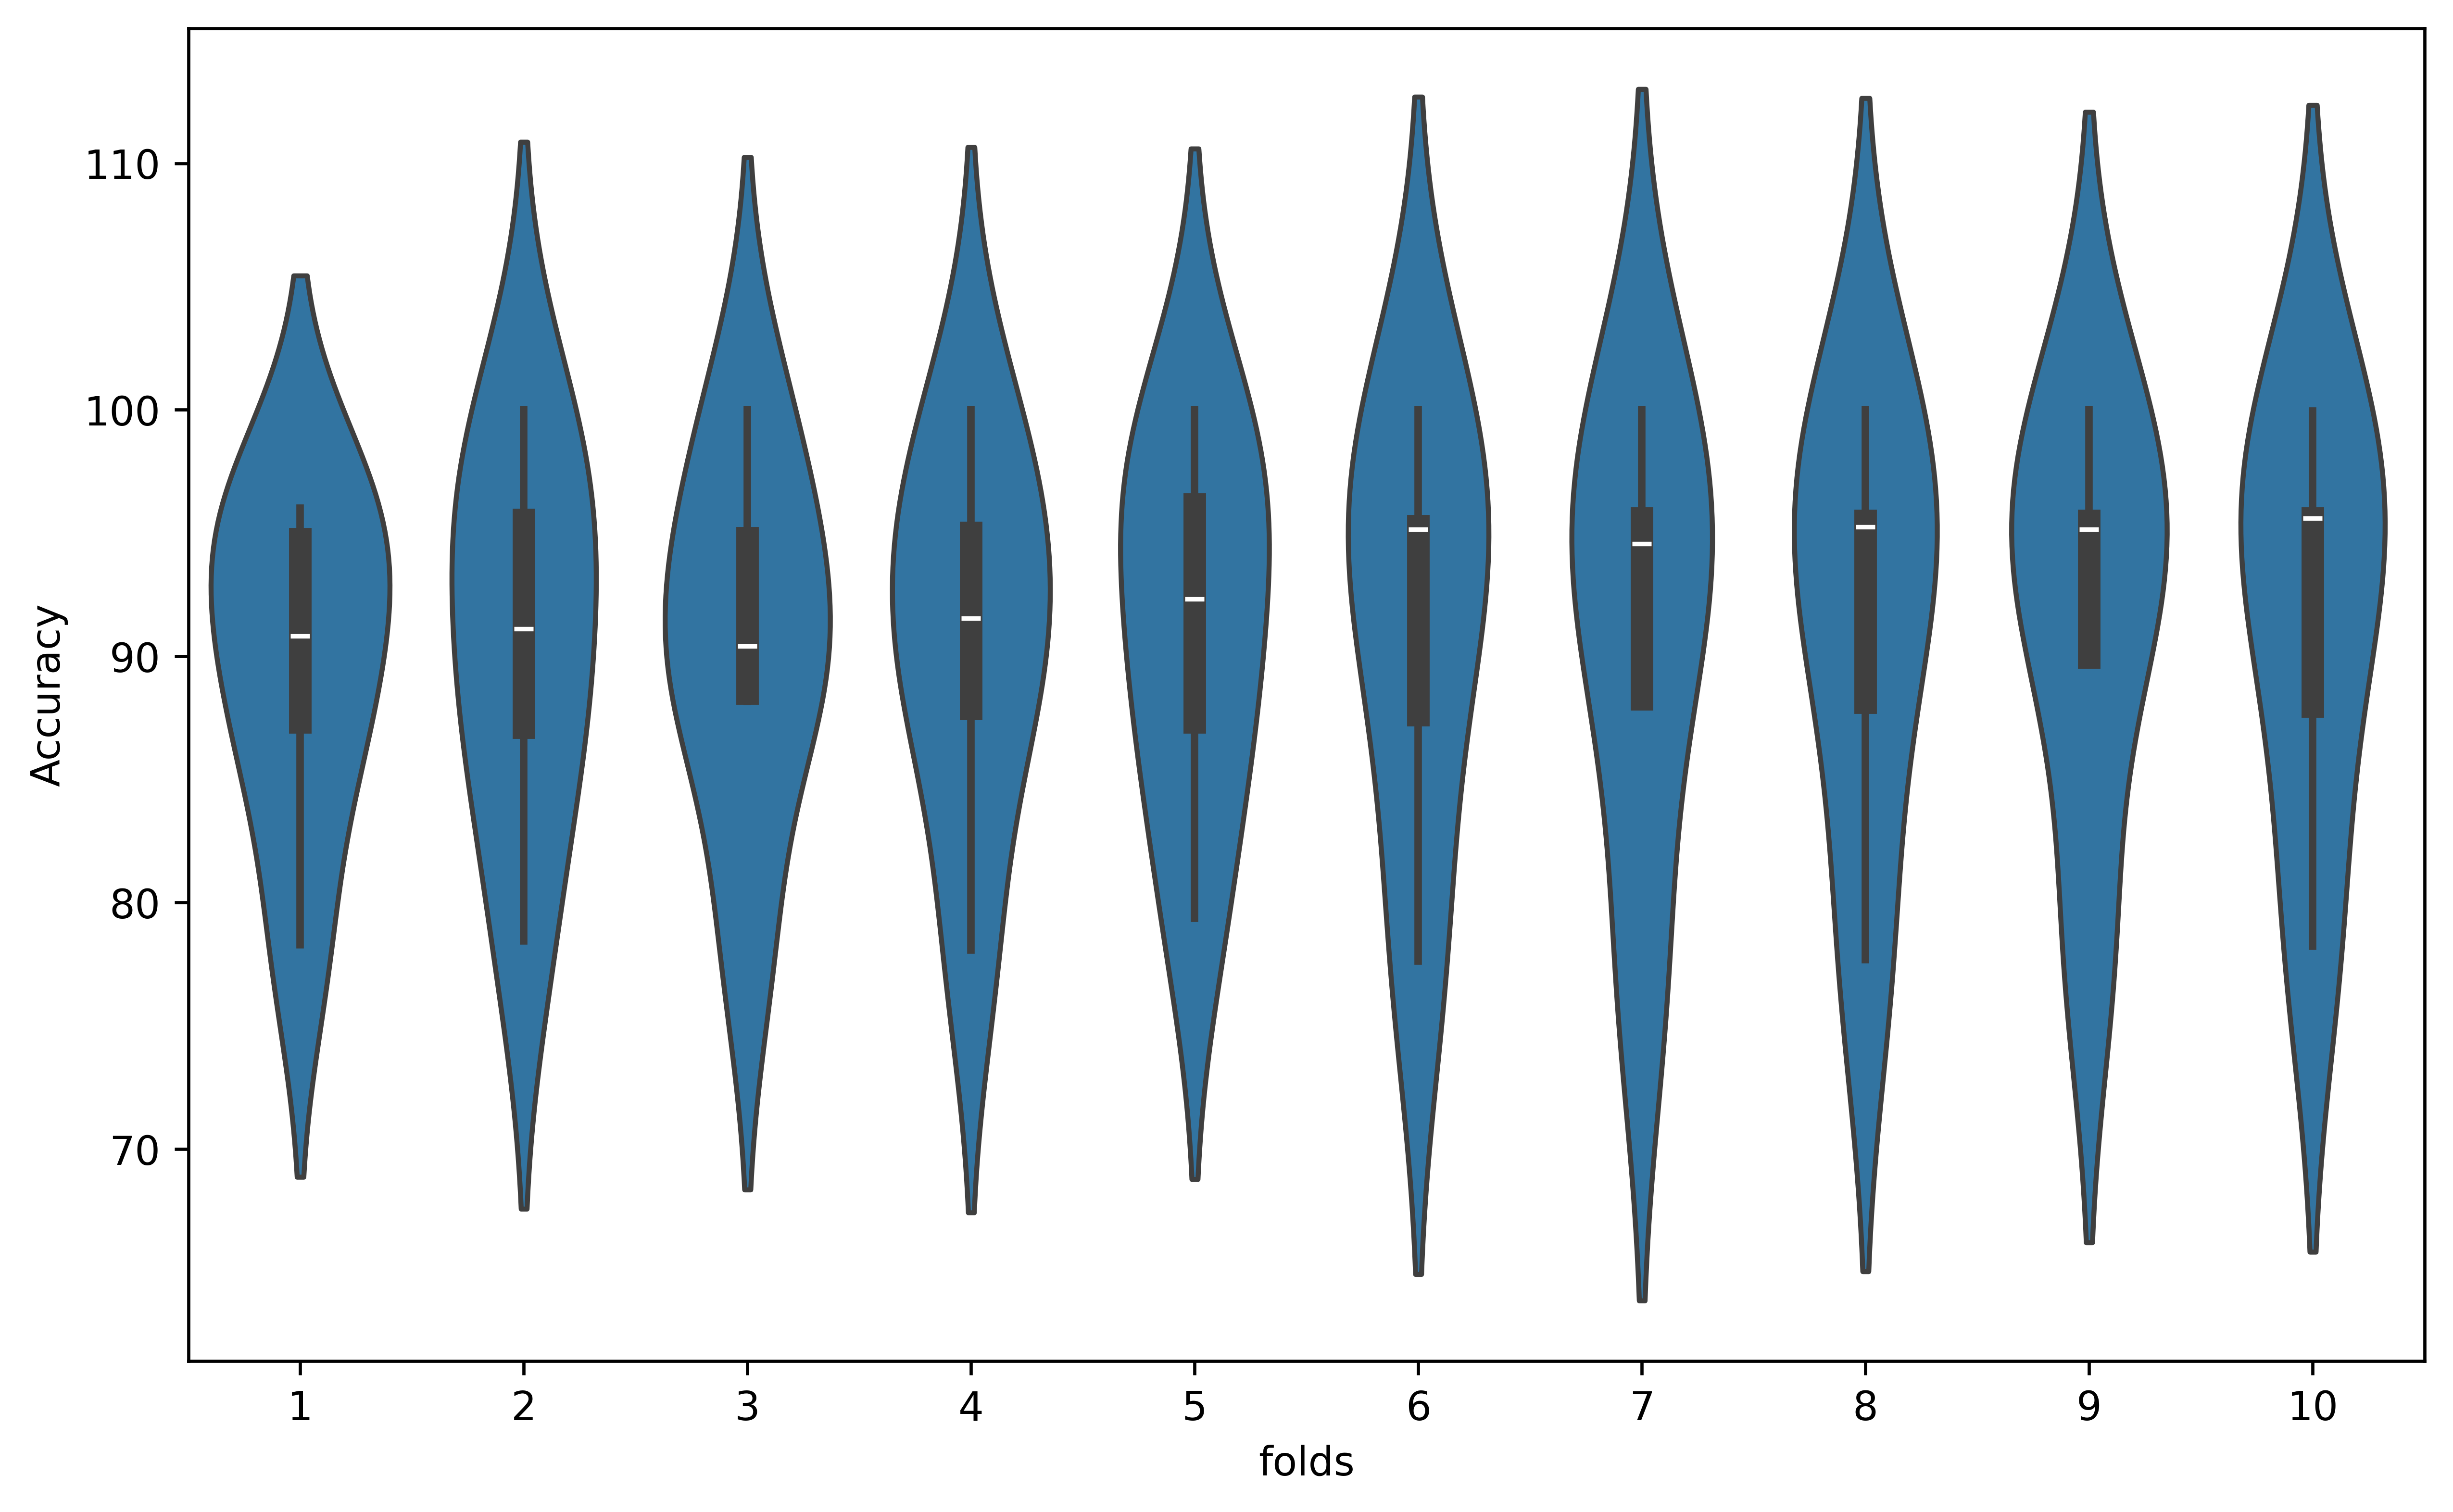

In [ ]:

# svc=cross_val_score(SVC(probability=True),X, y, cv=cv)
# st=cross_val_predict(MLPClassifier(), X, y,cv=cv,method='predict_proba')


import numpy as np
#lst_accu_stratifiedlgbm5.append(np.mean(lst_accu_stratifiedlgbm5))
st10 = {'Accuracy':[96.01, 95.85, 95.95, 95.39, 96.36, 95.14, 95.6, 95.49, 95.49, 95.6],
        'folds': [1,2,3,4,5,6,7,8,9,10],
      'algo': 'Ensemble'}
st10=pd.DataFrame(st10)

rf10 = {'Accuracy':[94.11,   100.0,   100.0, 100.0,   100.0,   100.0,  100.0,   100.0,  100.0,   99.95  ],
        'folds': [1,2,3,4,5,6,7,8,9,10],
      'algo': 'rf'}
rf10=pd.DataFrame(rf10)


lgbm10 = {'Accuracy':[78.3, 78.44, 78.6, 78.08, 79.37, 77.62, 76.86, 77.68, 78.29, 78.24 ],
        'folds': [1,2,3,4,5,6,7,8,9,10],
      'algo': 'lgbm'}
lgbm10=pd.DataFrame(lgbm10)


xgb10 = {'Accuracy':[87.26, 87.61, 89.45, 89.2, 89.09, 87.61, 88.27, 88.12, 89.96, 87.97],
        'folds': [1,2,3,4,5,6,7,8,9,10],
      'algo': 'ridge'}
xgb10=pd.DataFrame(xgb10)


# svm10 = {'Accuracy':[0.50810811, 0.57297297, 0.56216216, 0.47567568, 0.61413043],
#         'folds': [1,2,3,4,5],
#       'algo': 'svm'}
# svm10=pd.DataFrame(svm10)


et10 = {'Accuracy':[94.98, 94.62, 91.37, 93.86, 95.55, 95.29, 94.57, 95.24, 95.14, 95.6],
        'folds': [1,2,3,4,5,6,7,8,9,10],
      'algo': 'et'}
et10=pd.DataFrame(et10)



bgg10 = {'Accuracy':[89.25,89.66,89.55,90.32,90.68,88.63,90.07,88.94,89.5,89.71 ],
        'folds': [1,2,3,4,5,6,7,8,9,10],
      'algo': 'bg'}
bg10=pd.DataFrame(bg10)

v10 = pd.concat([rf10,et10,lgbm10,xgb10,st10,bg10], axis=0)





from matplotlib import pyplot
import seaborn
#import mylib
a4_dims = (10, 6)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims,dpi=600)
seaborn.violinplot(ax=ax, y=v10["Accuracy"], x=v10["folds"])

